<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1101-1150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3434]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3435]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

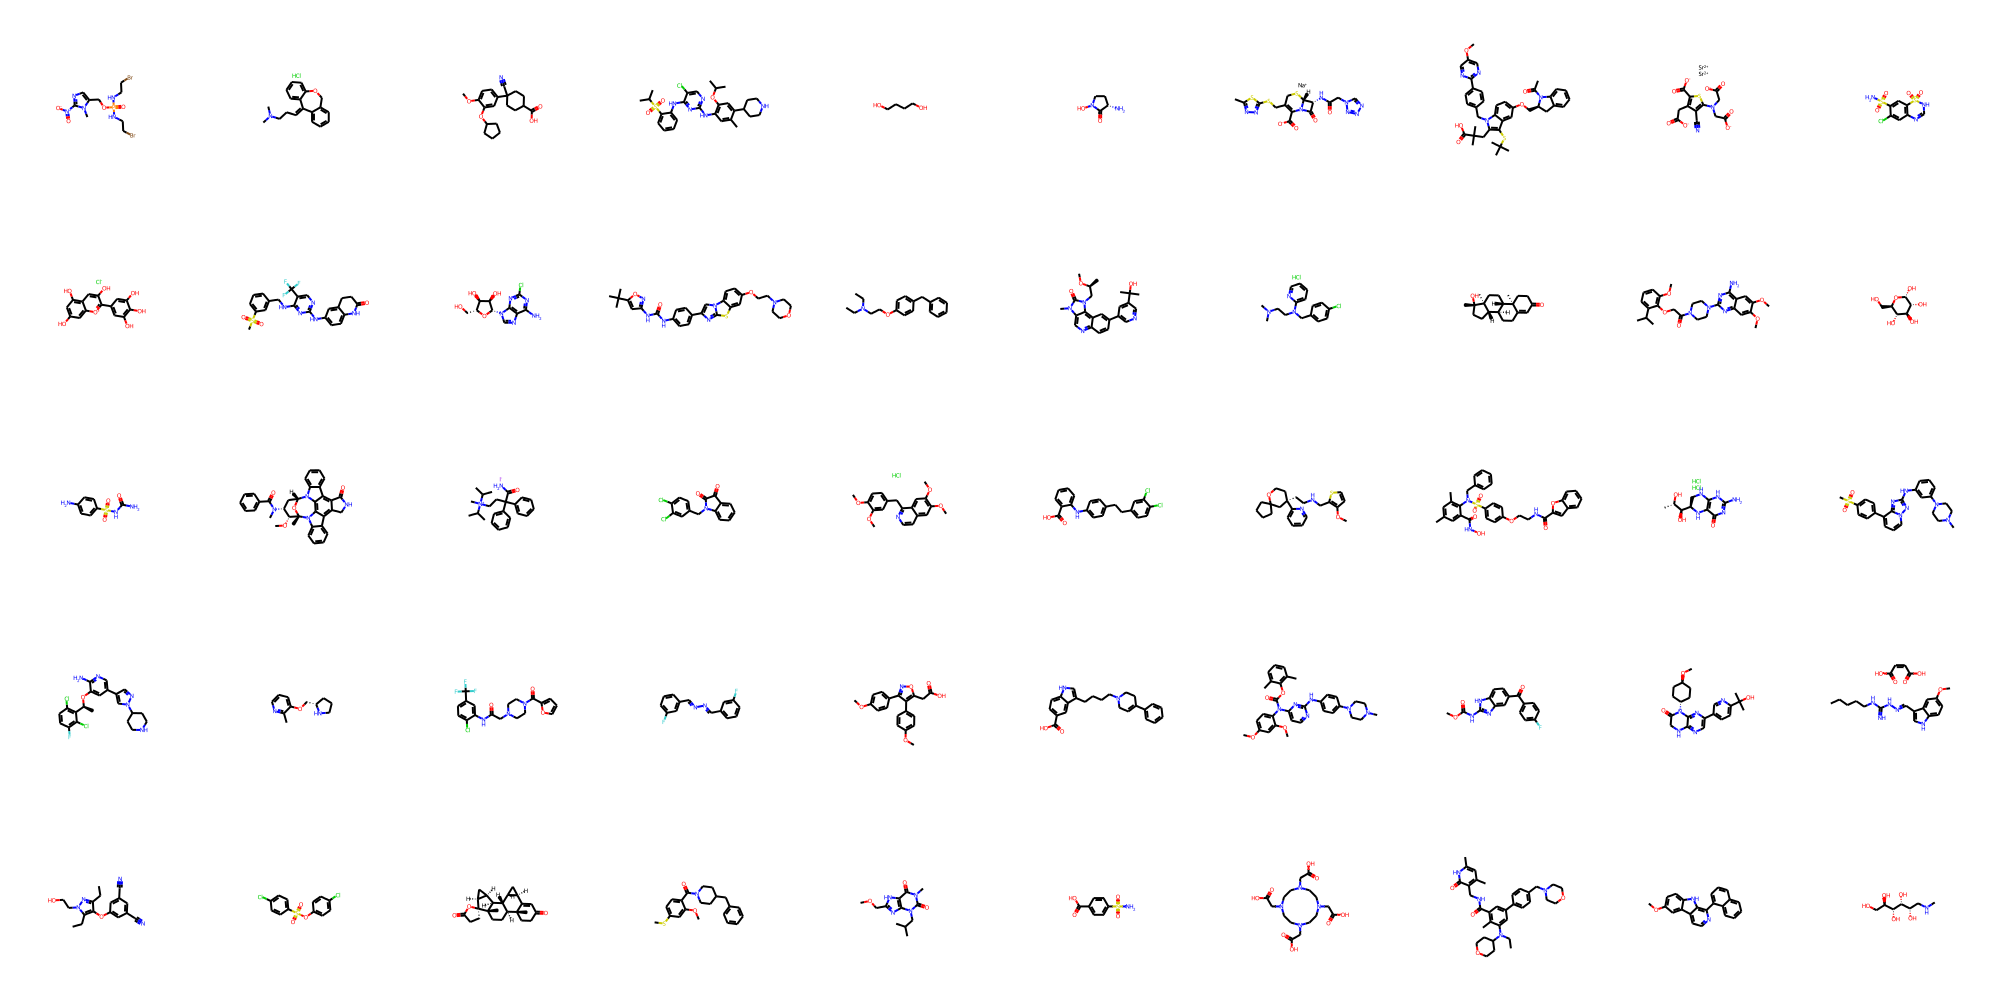

In [3436]:
smiles_list = [

'Cn1c(COP(=O)(NCCBr)NCCBr)cnc1[N+](=O)[O-]',
'CN(C)CC/C=C1/c2ccccc2COc2ccccc21.Cl',
'COc1ccc(C2(C#N)CCC(C(=O)O)CC2)cc1OC1CCCC1',
'Cc1cc(Nc2ncc(Cl)c(Nc3ccccc3S(=O)(=O)C(C)C)n2)c(OC(C)C)cc1C1CCNCC1',
'OCCCCO',
'N[C@H]1CCN(O)C1=O',
'Cc1nnc(SCC2=C(C(=O)[O-])N3C(=O)[C@@H](NC(=O)Cn4cnnn4)[C@H]3SC2)s1.[Na+]',
'COc1cnc(-c2ccc(Cn3c(CC(C)(C)C(=O)O)c(SC(C)(C)C)c4cc(OC[C@@H]5Cc6ccccc6N5C(C)=O)ccc43)cc2)nc1',
'N#Cc1c(N(CC(=O)[O-])CC(=O)[O-])sc(C(=O)[O-])c1CC(=O)[O-].[Sr+2].[Sr+2]',
'NS(=O)(=O)c1cc2c(cc1Cl)N=CNS2(=O)=O',
'Oc1cc(O)c2cc(O)c(-c3cc(O)c(O)c(O)c3)[o+]c2c1.[Cl-]',
'CS(=O)(=O)c1cccc(CNc2nc(Nc3ccc4c(c3)CCC(=O)N4)ncc2C(F)(F)F)c1',
'Nc1nc(Cl)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
'CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1',
'CCN(CC)CCOc1ccc(Cc2ccccc2)cc1',
'CO[C@@H](C)Cn1c(=O)n(C)c2cnc3ccc(-c4cncc(C(C)(C)O)c4)cc3c21',
'CN(C)CCN(Cc1ccc(Cl)cc1)c1ccccn1.Cl',
'C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'COc1cc2nc(N3CCN(C(=O)COc4c(OC)cccc4C(C)C)CC3)nc(N)c2cc1OC',
'OC[C@H]1O[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O',
'NC(=O)NS(=O)(=O)c1ccc(N)cc1',
'CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4',
'CC(C)[N+](C)(CCC(C(N)=O)(c1ccccc1)c1ccccc1)C(C)C.[I-]',
'O=C1C(=O)N(Cc2ccc(Cl)c(Cl)c2)c2ccccc21',
'COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC.Cl',
'O=C(O)c1ccccc1Nc1ccc(CCc2ccc(Cl)c(Cl)c2)cc1',
'COc1ccsc1CNCC[C@@]1(c2ccccn2)CCOC2(CCCC2)C1',
'Cc1cc(C)c(N(Cc2ccccc2)S(=O)(=O)c2ccc(OCCNC(=O)c3cc4ccccc4o3)cc2)c(C(=O)NO)c1',
'C[C@H](O)[C@H](O)[C@H]1CNc2[nH]c(N)nc(=O)c2N1.Cl.Cl',
'CN1CCN(c2cccc(Nc3nc4c(-c5ccc(S(C)(=O)=O)cc5)cccn4n3)c2)CC1',
'C[C@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl',
'Cc1ncccc1OC[C@@H]1CCCN1',
'O=C(CN1CCN(C(=O)c2ccco2)CC1)Nc1cc(C(F)(F)F)ccc1Cl',
'Fc1cccc(/C=N/N=C/c2cccc(F)c2)c1',
'COc1ccc(-c2noc(CC(=O)O)c2-c2ccc(OC)cc2)cc1',
'O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1',
'COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3ccc(N4CCN(C)CC4)cc3)n2)c(OC)c1',
'COC(=O)Nc1nc2cc(C(=O)c3ccc(F)cc3)ccc2[nH]1',
'CO[C@H]1CC[C@H](N2C(=O)CNc3ncc(-c4ccc(C(C)(C)O)nc4)nc32)CC1',
'CCCCCNC(=N)N/N=C/c1c[nH]c2ccc(OC)cc12.O=C(O)/C=C\C(=O)O',
'CCc1nn(CCO)c(CC)c1Oc1cc(C#N)cc(C#N)c1',
'O=S(=O)(Oc1ccc(Cl)cc1)c1ccc(Cl)cc1',
'C[C@]12CC[C@H]3[C@H]([C@@H]1[C@@H]1C[C@@H]1[C@@]21CCC(=O)O1)[C@H]1C[C@H]1C1=CC(=O)CC[C@@]13C',
'COc1cc(SC)ccc1C(=O)N1CCC(Cc2ccccc2)CC1',
'COCc1nc2c([nH]1)c(=O)n(C)c(=O)n2CC(C)C',
'NS(=O)(=O)c1ccc(C(=O)O)cc1',
'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1',
'CCN(c1cc(-c2ccc(CN3CCOCC3)cc2)cc(C(=O)NCc2c(C)cc(C)[nH]c2=O)c1C)C1CCOCC1',
'COc1ccc2[nH]c3c(-c4cccc5ccccc45)nccc3c2c1',
'CNC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



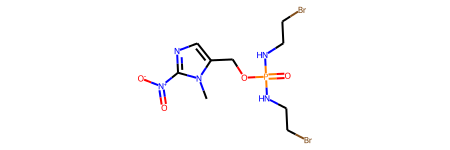

In [3437]:
M1 = mol_list [0]
M1

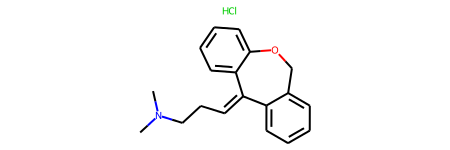

In [3438]:
M2 = mol_list [1]
M2

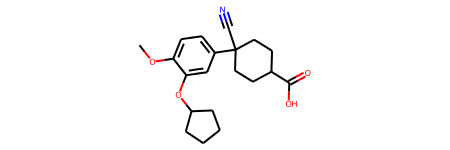

In [3439]:
M3 = mol_list [2]
M3

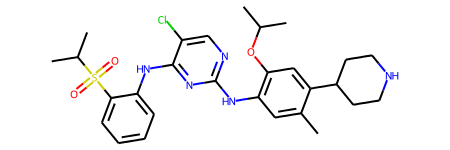

In [3440]:
M4 = mol_list [3]
M4

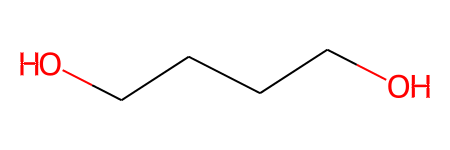

In [3441]:
M5 = mol_list [4]
M5

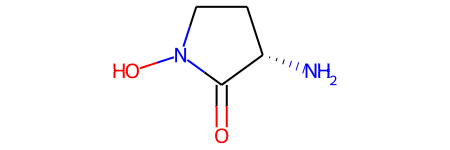

In [3442]:
M6 = mol_list [5]
M6

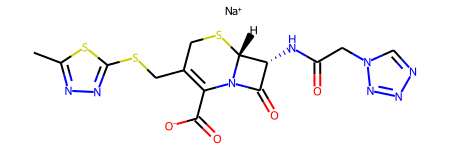

In [3443]:
M7 = mol_list [6]
M7

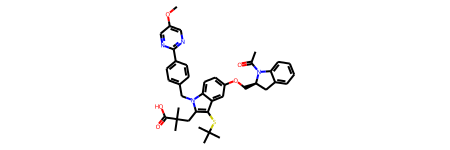

In [3444]:
M8 = mol_list [7]
M8

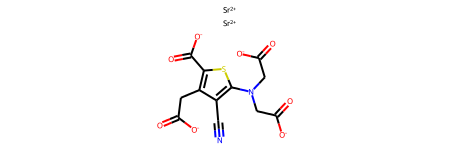

In [3445]:
M9 = mol_list [8]
M9

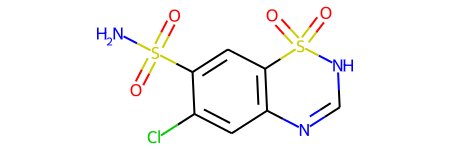

In [3446]:
M10 = mol_list [9]
M10

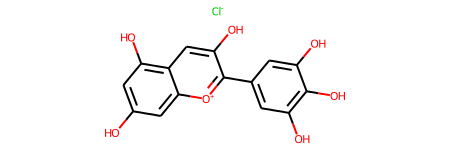

In [3447]:
M11 = mol_list [10]
M11

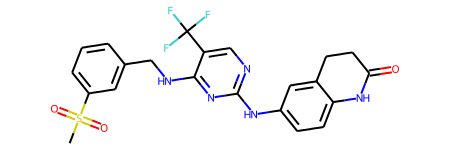

In [3448]:
M12 = mol_list [11]
M12

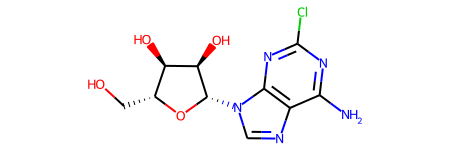

In [3449]:
M13 = mol_list [12]
M13

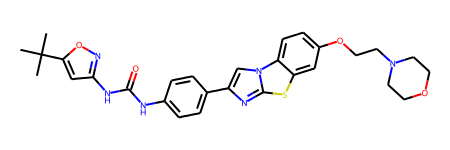

In [3450]:
M14 = mol_list [13]
M14

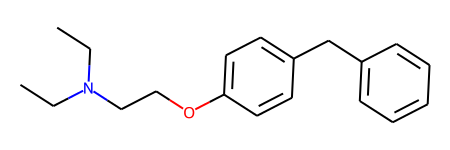

In [3451]:
M15 = mol_list [14]
M15

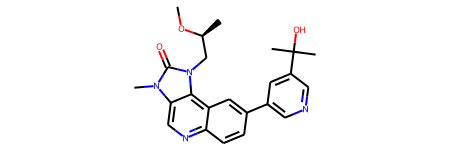

In [3452]:
M16 = mol_list [15]
M16

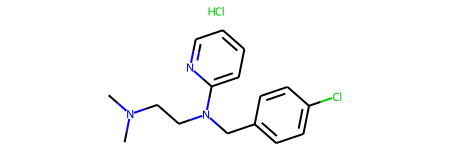

In [3453]:
M17 = mol_list [16]
M17

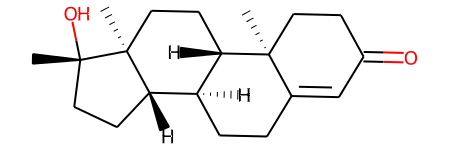

In [3454]:
M18 = mol_list [17]
M18

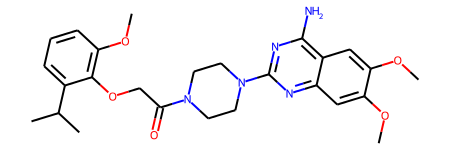

In [3455]:
M19 = mol_list [18]
M19

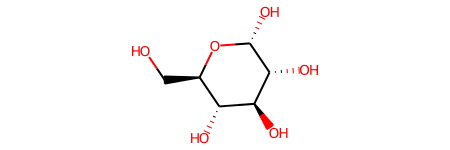

In [3456]:
M20 = mol_list [19]
M20

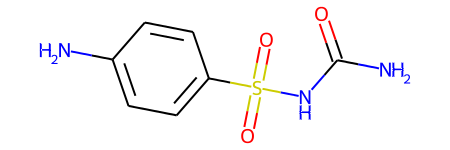

In [3457]:
M21 = mol_list [20]
M21

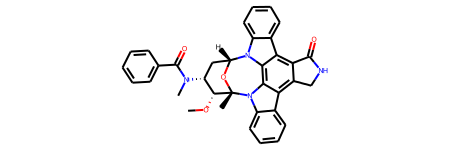

In [3458]:
M22 = mol_list [21]
M22

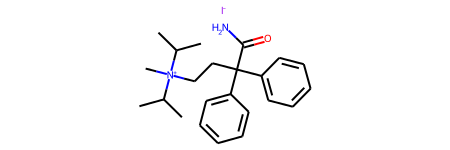

In [3459]:
M23 = mol_list [22]
M23

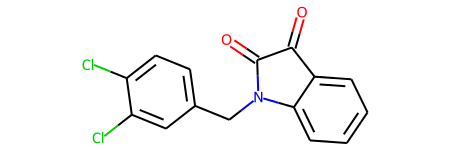

In [3460]:
M24 = mol_list [23]
M24

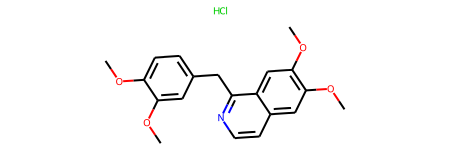

In [3461]:
M25 = mol_list [24]
M25

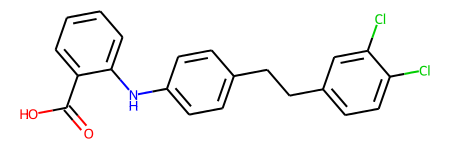

In [3462]:
M26 = mol_list [25]
M26

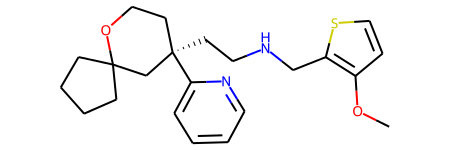

In [3463]:
M27 = mol_list [26]
M27

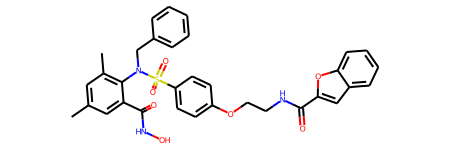

In [3464]:
M28 = mol_list [27]
M28

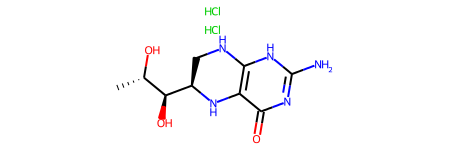

In [3465]:
M29 = mol_list [28]
M29

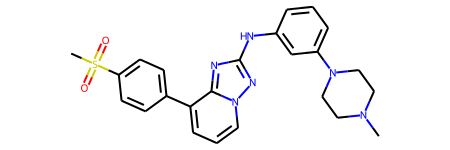

In [3466]:
M30 = mol_list [29]
M30

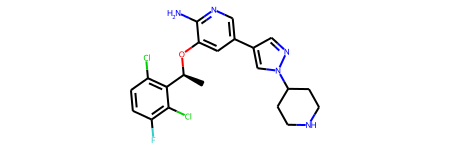

In [3467]:
M31 = mol_list [30]
M31

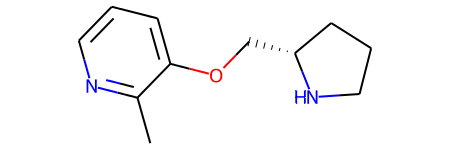

In [3468]:
M32 = mol_list [31]
M32

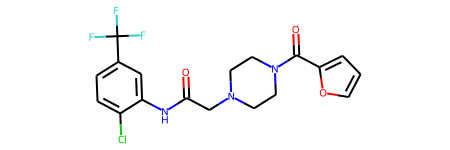

In [3469]:
M33 = mol_list [32]
M33

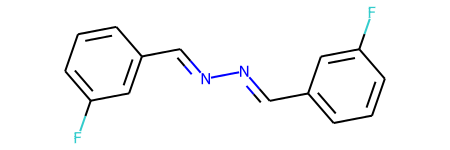

In [3470]:
M34 = mol_list [33]
M34

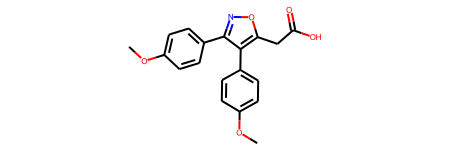

In [3471]:
M35 = mol_list [34]
M35

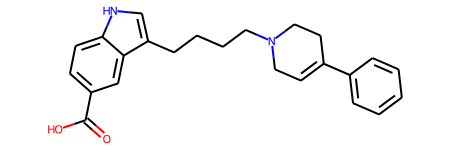

In [3472]:
M36 = mol_list [35]
M36

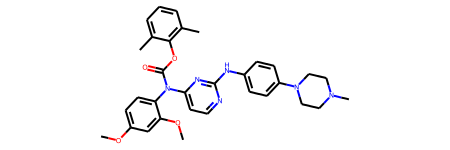

In [3473]:
M37= mol_list [36]
M37

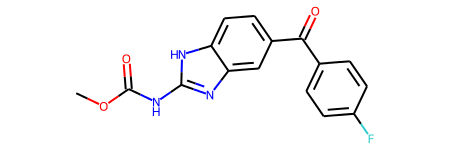

In [3474]:
M38= mol_list [37]
M38

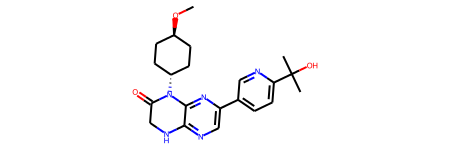

In [3475]:
M39= mol_list [38]
M39

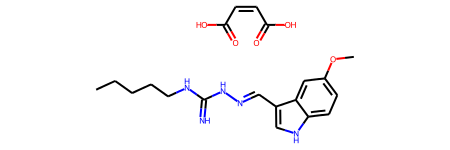

In [3476]:
M40= mol_list [39]
M40

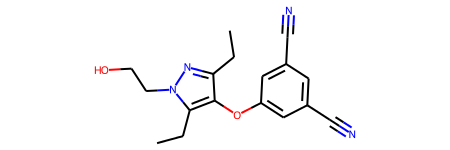

In [3477]:
M41= mol_list [40]
M41

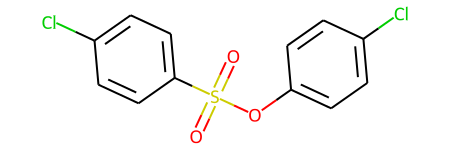

In [3478]:
M42= mol_list [41]
M42

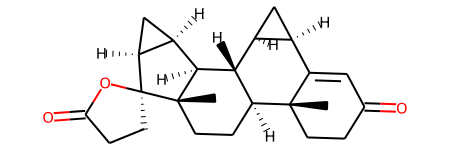

In [3479]:
M43= mol_list [42]
M43

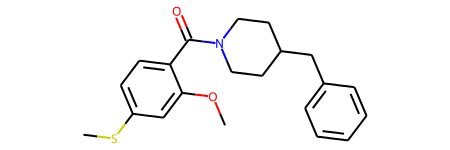

In [3480]:
M44= mol_list [43]
M44

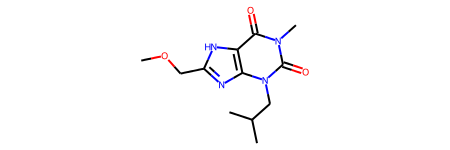

In [3481]:
M45= mol_list [44]
M45

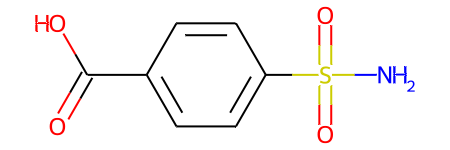

In [3482]:
M46= mol_list [45]
M46

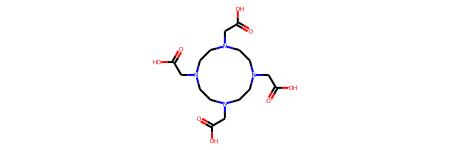

In [3483]:
M47= mol_list [46]
M47

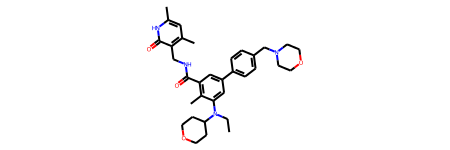

In [3484]:
M48= mol_list [47]
M48

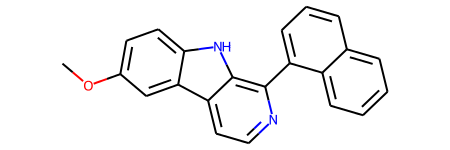

In [3485]:
M49= mol_list [48]
M49

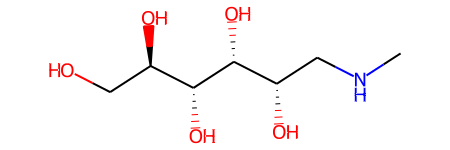

In [3486]:
M50= mol_list [49]
M50

In [3487]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 80,
 116,
 121,
 128,
 171,
 192,
 251,
 279,
 290,
 338,
 356,
 378,
 395,
 428,
 486,
 495,
 511,
 523,
 564,
 601,
 640,
 650,
 667,
 692,
 695,
 710,
 715,
 728,
 745,
 753,
 797,
 828,
 838,
 839,
 849,
 905,
 935,
 939,
 956,
 960]

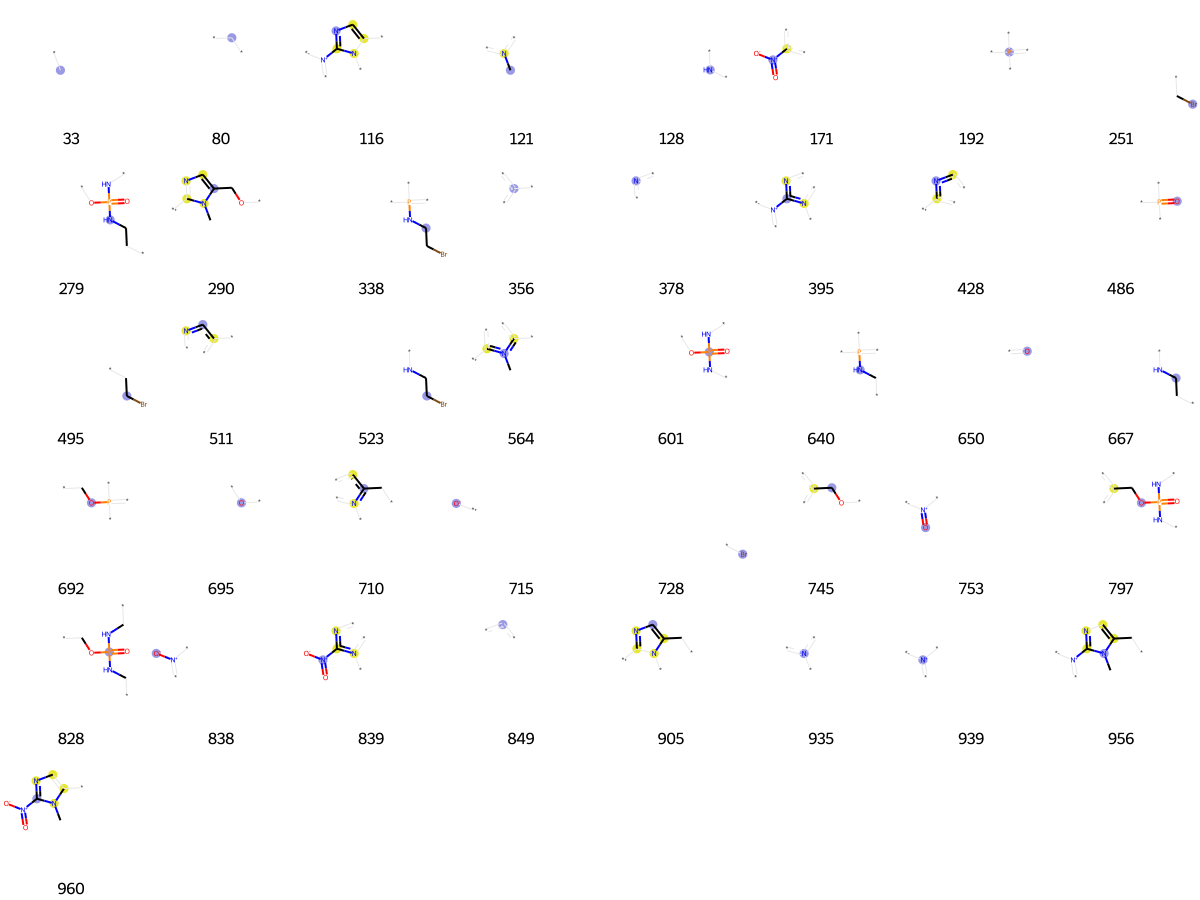

In [3488]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [3489]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 64,
 80,
 96,
 118,
 139,
 175,
 212,
 331,
 351,
 352,
 356,
 372,
 401,
 441,
 457,
 478,
 514,
 576,
 609,
 652,
 656,
 684,
 693,
 694,
 726,
 760,
 770,
 792,
 849,
 881,
 926,
 927,
 984,
 1005]

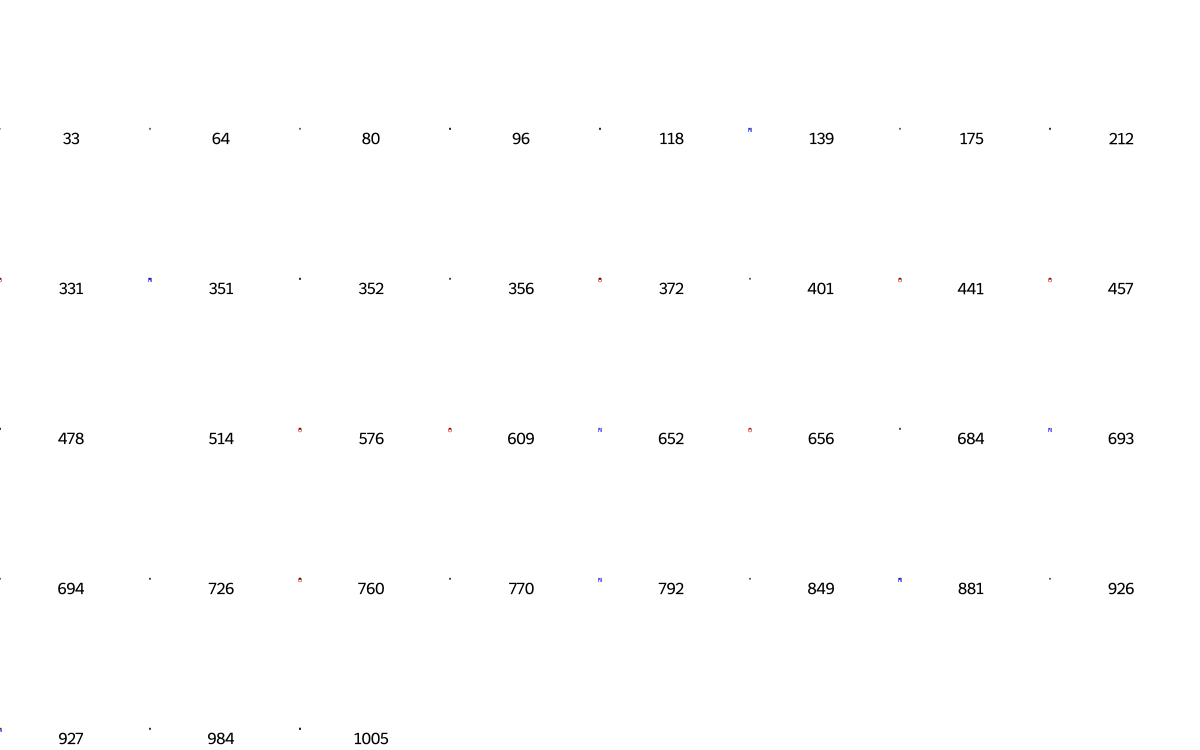

In [3490]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [3491]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 14,
 26,
 33,
 36,
 39,
 87,
 94,
 119,
 123,
 138,
 140,
 226,
 233,
 248,
 249,
 250,
 301,
 336,
 337,
 356,
 360,
 389,
 407,
 416,
 484,
 505,
 512,
 524,
 556,
 650,
 674,
 695,
 726,
 790,
 807,
 841,
 849,
 875,
 890,
 893,
 926,
 946,
 974,
 999,
 1019]

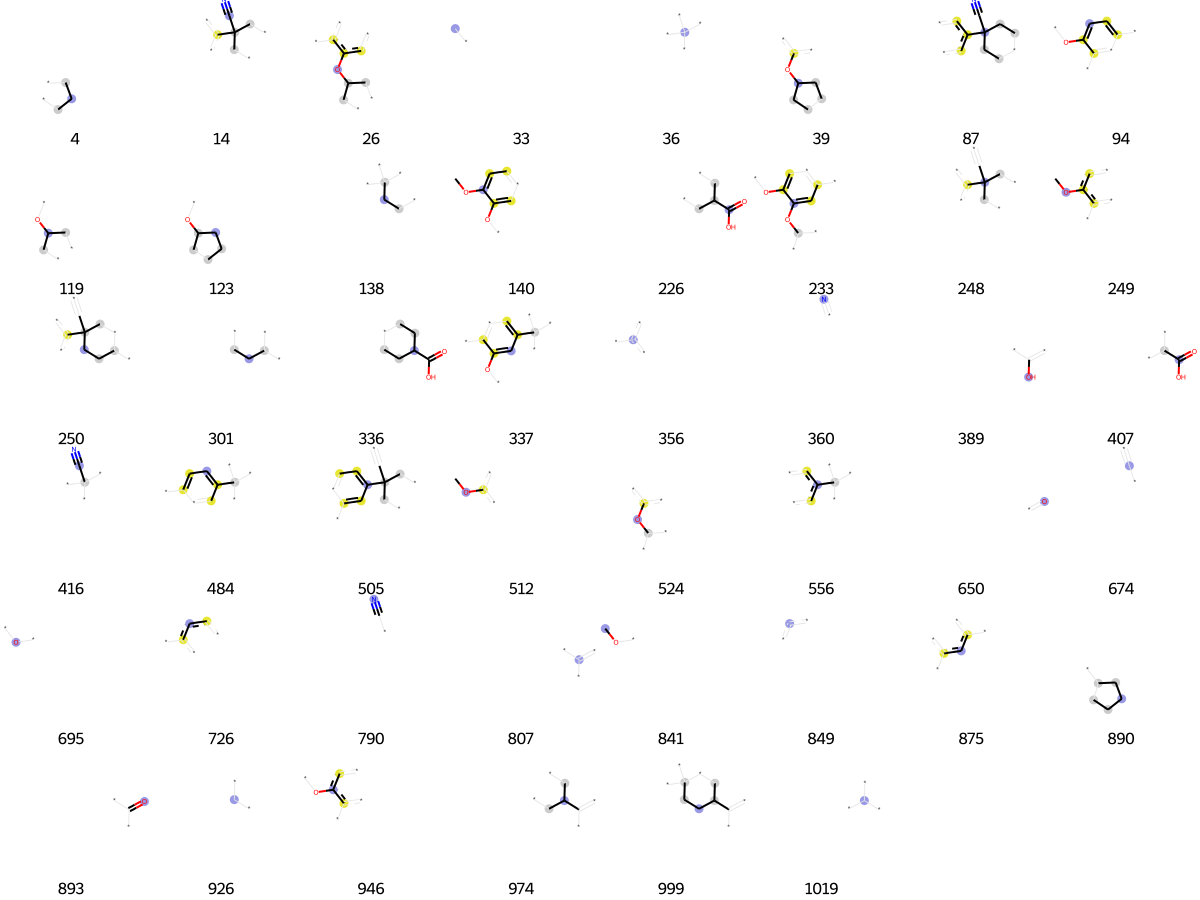

In [3492]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [3493]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 3,
 33,
 55,
 64,
 90,
 128,
 155,
 175,
 200,
 233,
 275,
 283,
 284,
 297,
 301,
 305,
 342,
 350,
 356,
 365,
 366,
 367,
 378,
 392,
 428,
 434,
 452,
 458,
 489,
 491,
 492,
 504,
 511,
 544,
 547,
 555,
 558,
 561,
 601,
 650,
 659,
 660,
 664,
 672,
 695,
 697,
 698,
 708,
 721,
 726,
 769,
 826,
 831,
 849,
 869,
 875,
 881,
 889,
 926,
 940,
 946,
 954,
 976,
 992,
 1019]

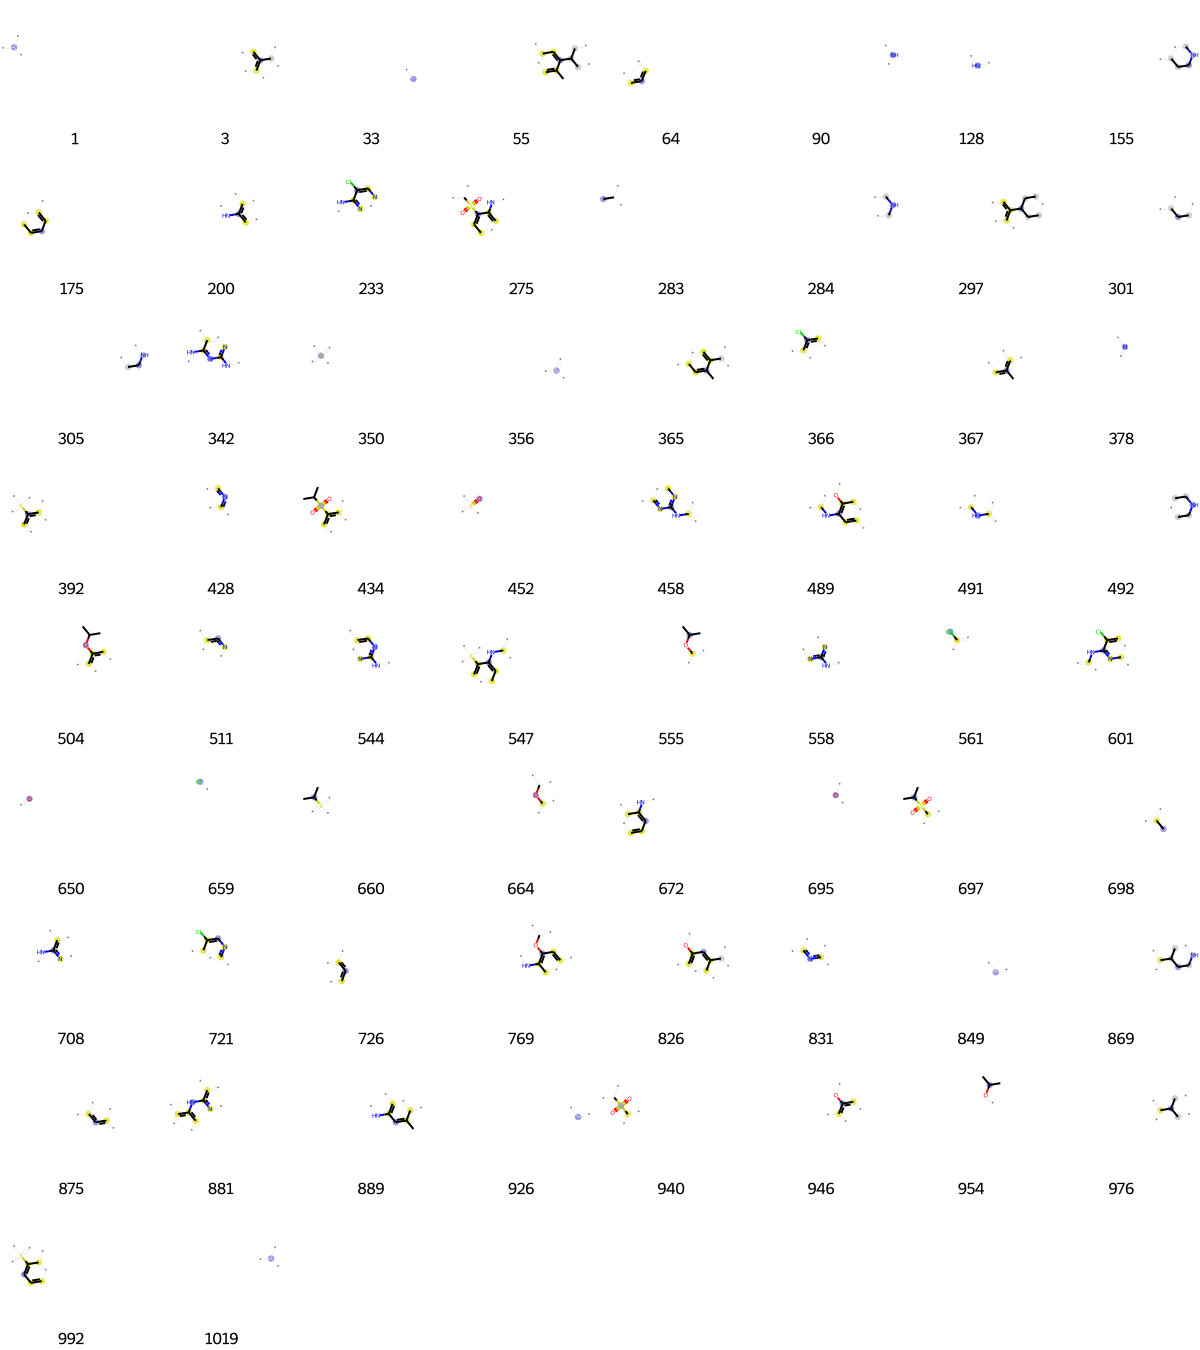

In [3494]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [3495]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[80, 106, 222, 473, 541, 807, 887]

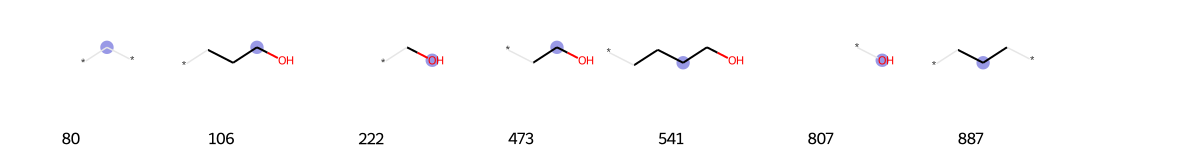

In [3496]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [3497]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[5,
 65,
 147,
 189,
 301,
 314,
 356,
 456,
 532,
 570,
 587,
 650,
 740,
 807,
 808,
 926,
 935,
 1003,
 1019]

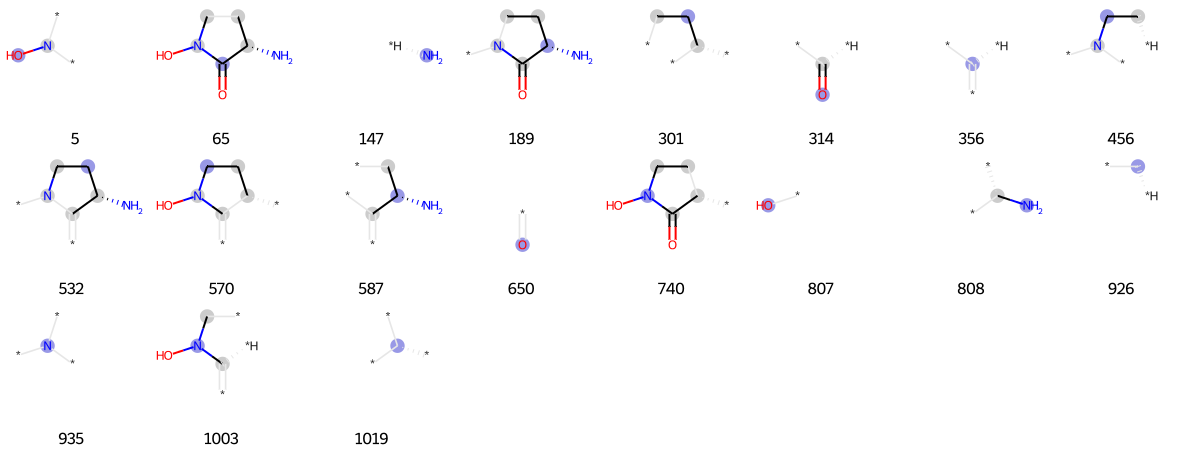

In [3498]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [3499]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[5,
 33,
 39,
 40,
 41,
 61,
 80,
 89,
 116,
 118,
 128,
 140,
 162,
 165,
 186,
 189,
 202,
 233,
 243,
 255,
 281,
 288,
 294,
 305,
 314,
 329,
 341,
 356,
 378,
 387,
 390,
 417,
 419,
 470,
 484,
 486,
 543,
 544,
 614,
 650,
 665,
 675,
 698,
 715,
 747,
 753,
 759,
 762,
 797,
 807,
 849,
 859,
 872,
 882,
 892,
 893,
 898,
 926,
 932,
 935,
 941,
 998,
 999,
 1019]

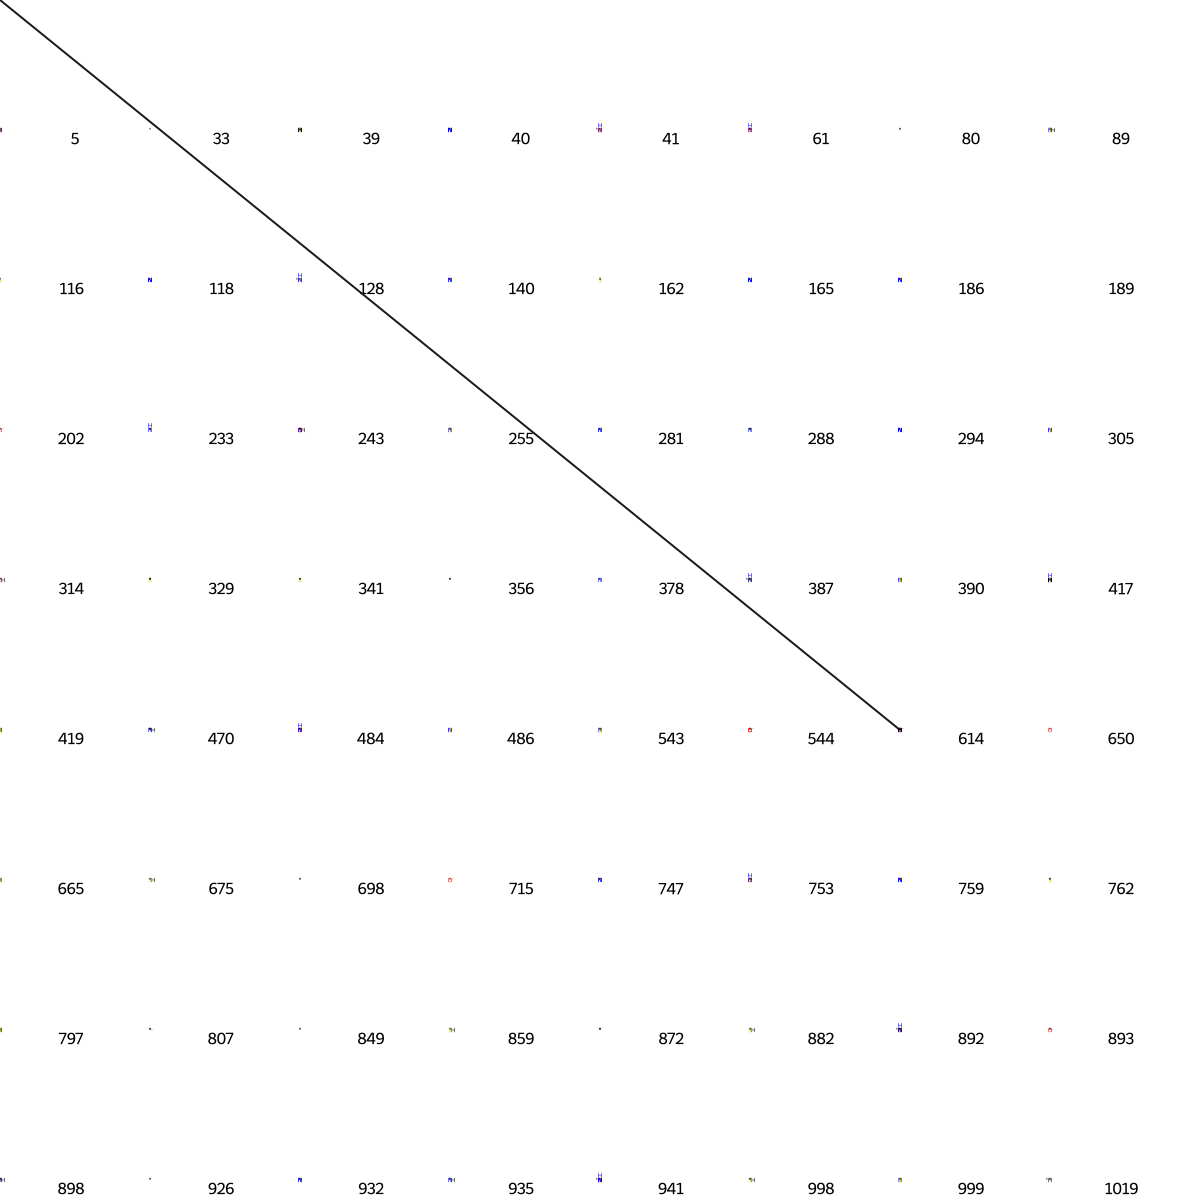

In [3500]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [3501]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 35,
 45,
 60,
 64,
 80,
 85,
 87,
 112,
 114,
 116,
 136,
 168,
 171,
 175,
 207,
 212,
 215,
 227,
 230,
 231,
 236,
 240,
 271,
 276,
 285,
 310,
 322,
 333,
 335,
 341,
 356,
 361,
 378,
 389,
 392,
 422,
 428,
 474,
 477,
 511,
 512,
 528,
 567,
 574,
 588,
 623,
 633,
 650,
 659,
 666,
 672,
 684,
 692,
 695,
 718,
 726,
 730,
 741,
 749,
 759,
 781,
 802,
 807,
 810,
 837,
 841,
 849,
 867,
 875,
 888,
 893,
 896,
 926,
 935,
 953,
 960,
 997,
 1017,
 1019]

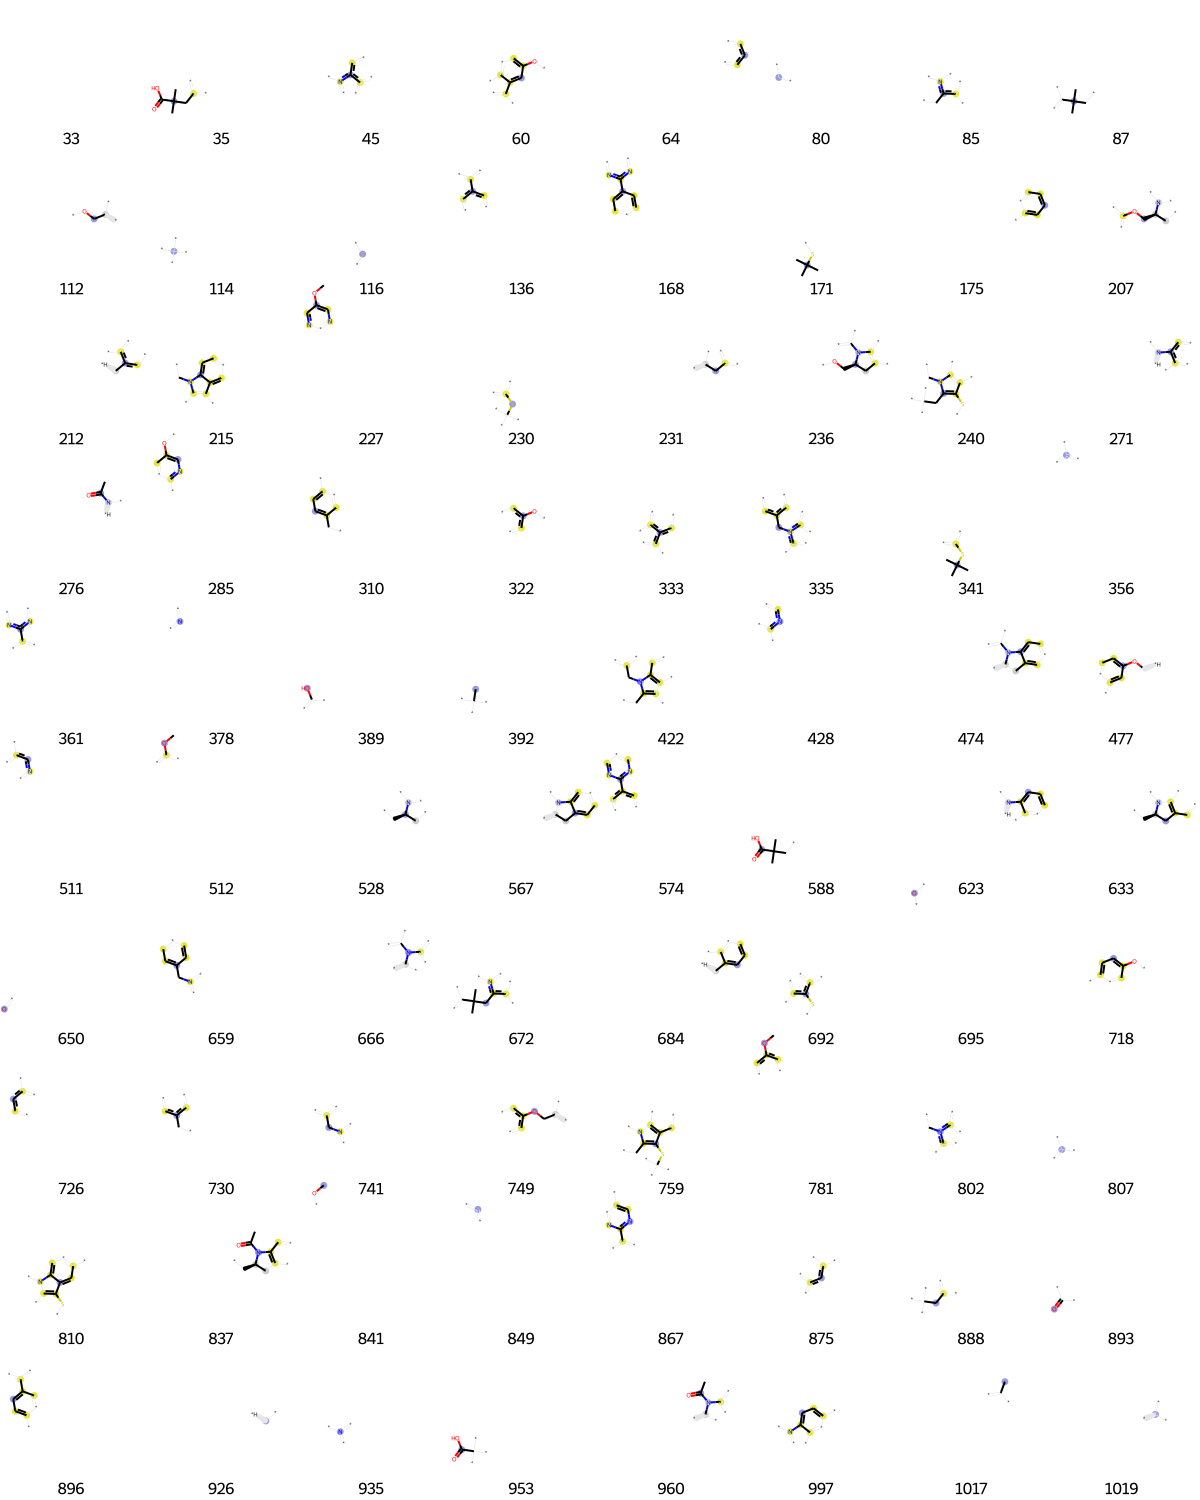

In [3502]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [3503]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[80,
 112,
 145,
 162,
 166,
 202,
 210,
 213,
 284,
 325,
 356,
 358,
 360,
 410,
 544,
 591,
 596,
 623,
 650,
 663,
 674,
 675,
 715,
 763,
 781,
 785,
 790,
 807,
 853,
 881,
 893,
 908,
 909,
 923,
 928,
 1010]

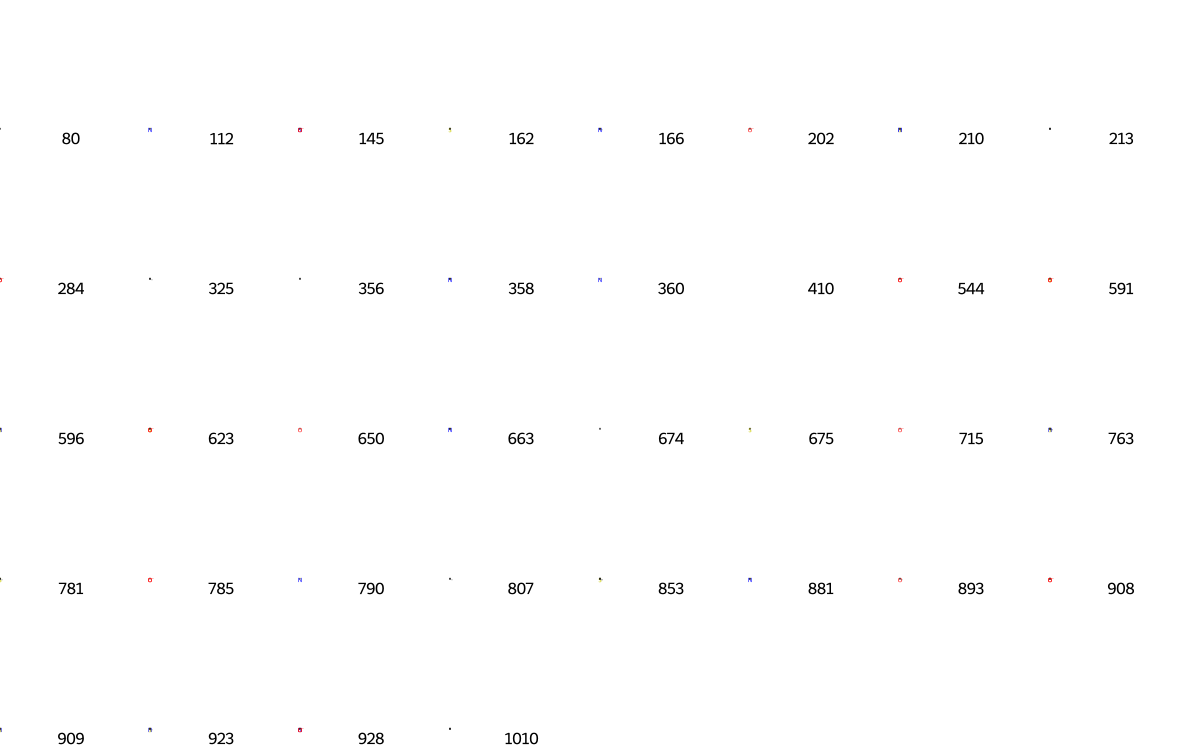

In [3504]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [3505]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[90,
 107,
 147,
 158,
 176,
 207,
 252,
 283,
 296,
 350,
 356,
 366,
 378,
 392,
 440,
 452,
 469,
 552,
 561,
 568,
 583,
 650,
 659,
 691,
 730,
 780,
 817,
 826,
 833,
 840,
 849,
 875,
 924,
 926]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


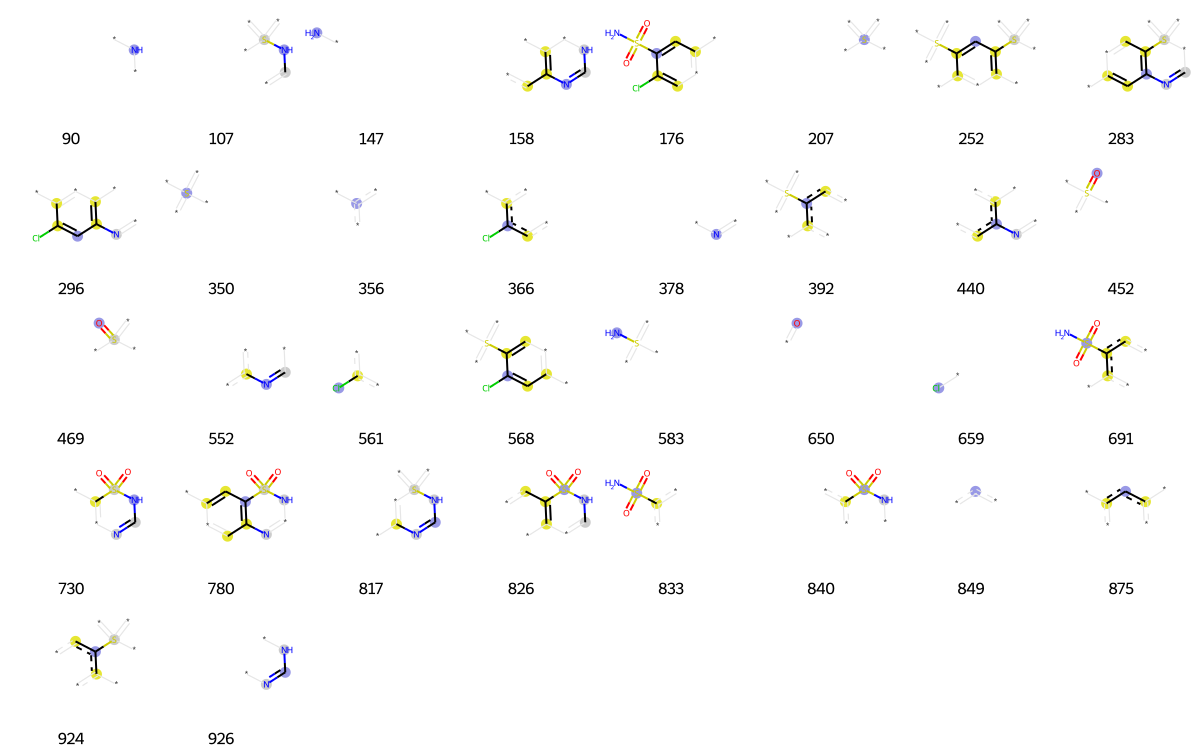

In [3506]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [3507]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[136,
 157,
 165,
 167,
 194,
 202,
 318,
 323,
 333,
 352,
 356,
 397,
 578,
 583,
 691,
 739,
 745,
 752,
 807,
 816,
 824,
 842,
 849,
 855,
 875,
 934,
 964]

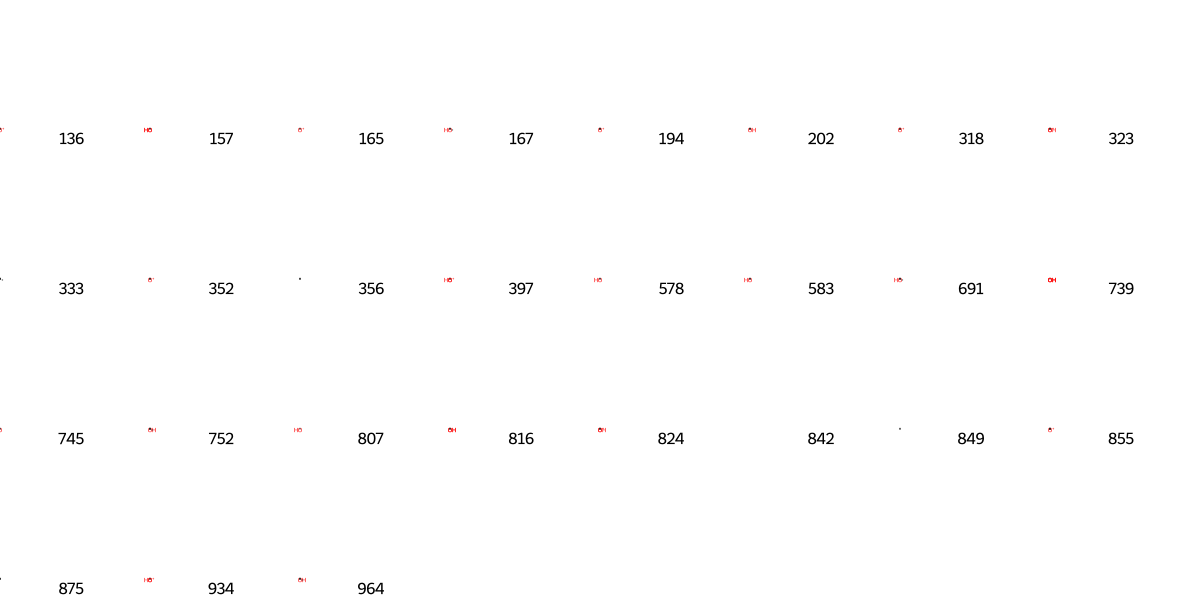

In [3508]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [3509]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[15,
 33,
 36,
 42,
 57,
 64,
 71,
 74,
 80,
 90,
 114,
 128,
 191,
 212,
 235,
 252,
 255,
 262,
 314,
 319,
 329,
 342,
 350,
 356,
 370,
 378,
 392,
 402,
 419,
 428,
 429,
 452,
 458,
 491,
 511,
 544,
 551,
 558,
 562,
 569,
 575,
 622,
 641,
 643,
 650,
 678,
 692,
 702,
 708,
 714,
 726,
 730,
 755,
 809,
 831,
 843,
 849,
 875,
 904,
 926,
 933,
 958,
 973,
 980,
 988]

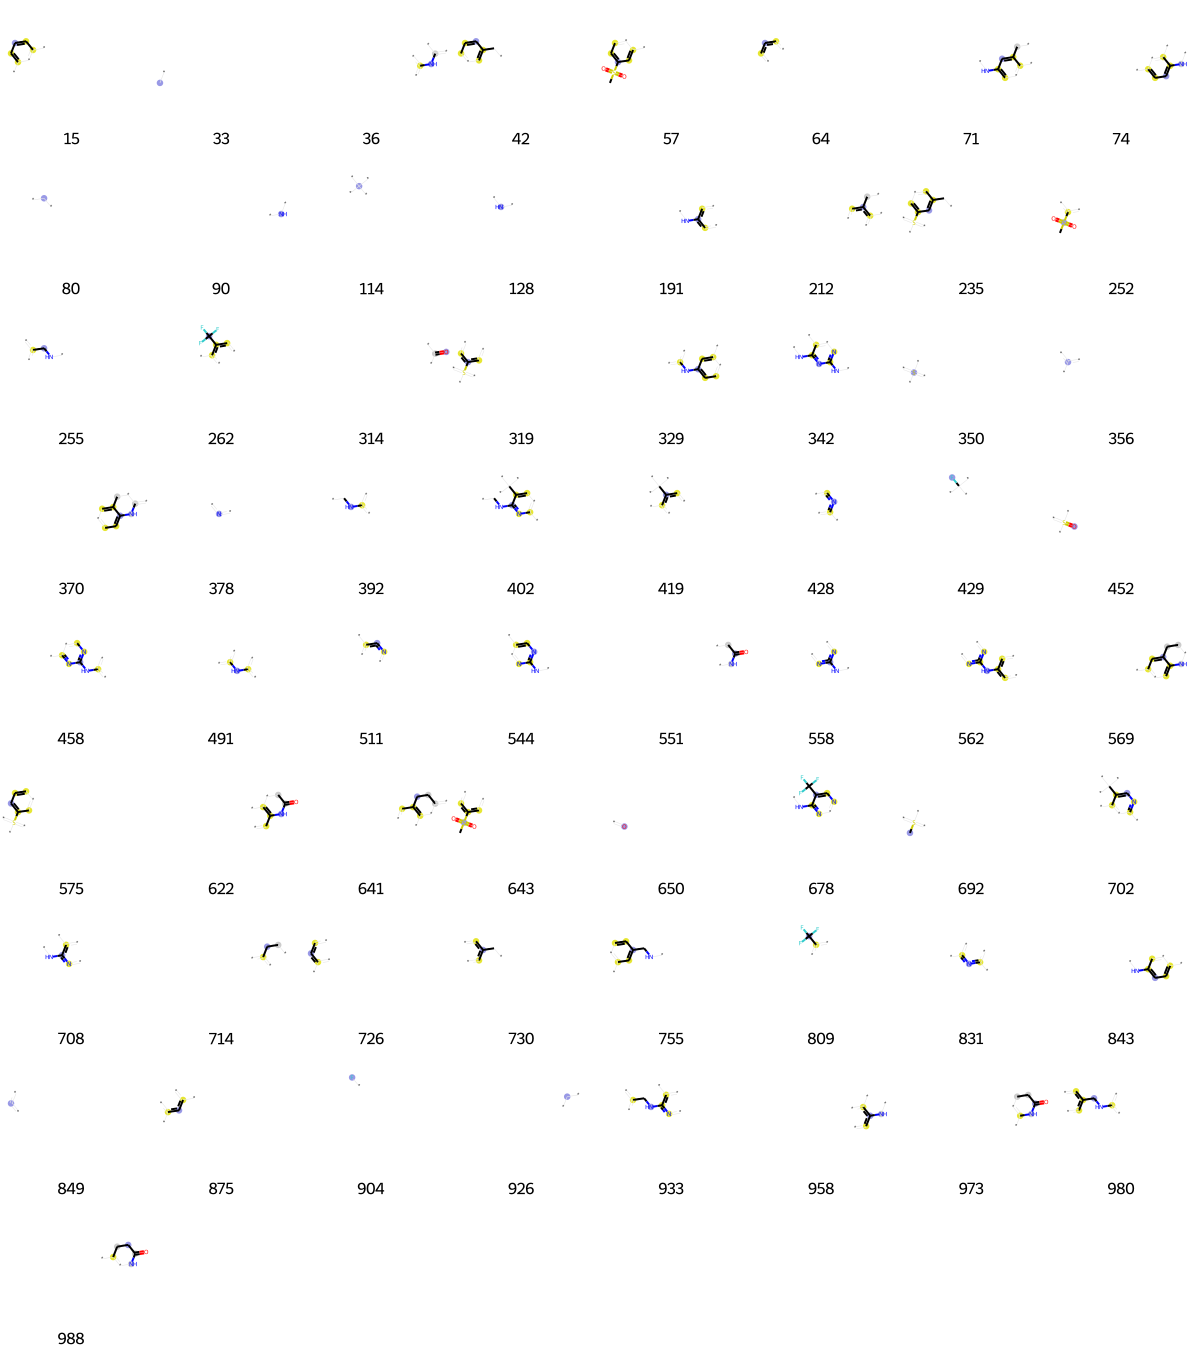

In [3510]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [3511]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[9,
 71,
 75,
 80,
 128,
 147,
 152,
 185,
 194,
 210,
 222,
 233,
 313,
 356,
 378,
 418,
 428,
 433,
 435,
 454,
 463,
 492,
 519,
 561,
 577,
 610,
 656,
 659,
 672,
 677,
 700,
 740,
 807,
 820,
 831,
 849,
 897,
 930,
 932,
 935,
 1019]

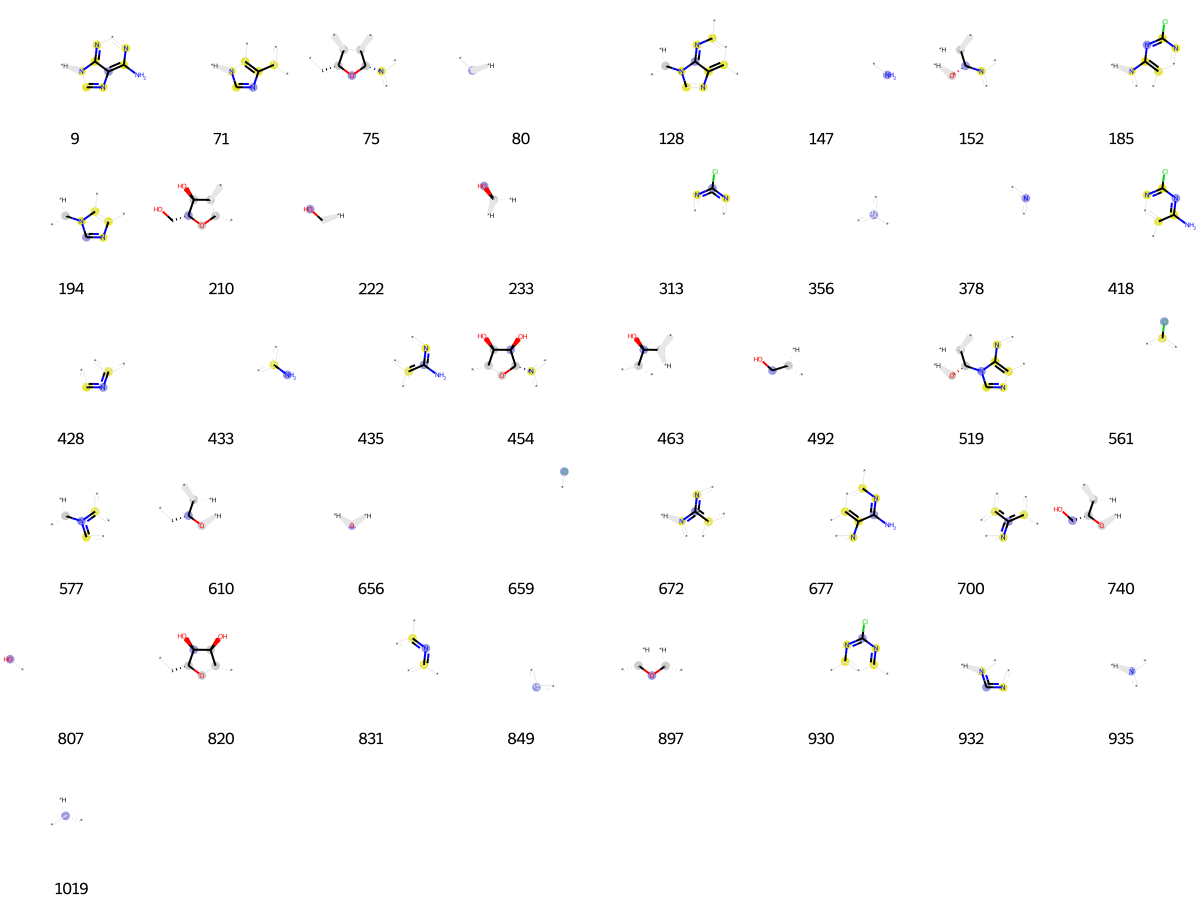

In [3512]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [3513]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[10,
 13,
 33,
 45,
 53,
 56,
 75,
 80,
 88,
 114,
 121,
 128,
 136,
 157,
 162,
 191,
 194,
 196,
 248,
 315,
 322,
 348,
 356,
 363,
 378,
 381,
 392,
 417,
 420,
 428,
 456,
 458,
 464,
 470,
 477,
 480,
 493,
 518,
 523,
 533,
 559,
 650,
 656,
 674,
 675,
 681,
 687,
 695,
 718,
 726,
 767,
 792,
 806,
 807,
 808,
 825,
 831,
 843,
 849,
 875,
 885,
 893,
 896,
 926,
 935,
 945,
 946,
 947,
 950,
 965,
 966,
 980,
 997]

In [3514]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[10,
 13,
 33,
 39,
 42,
 64,
 80,
 102,
 172,
 175,
 251,
 294,
 310,
 322,
 356,
 389,
 406,
 428,
 620,
 695,
 718,
 726,
 730,
 815,
 819,
 849,
 881,
 927,
 932,
 957]

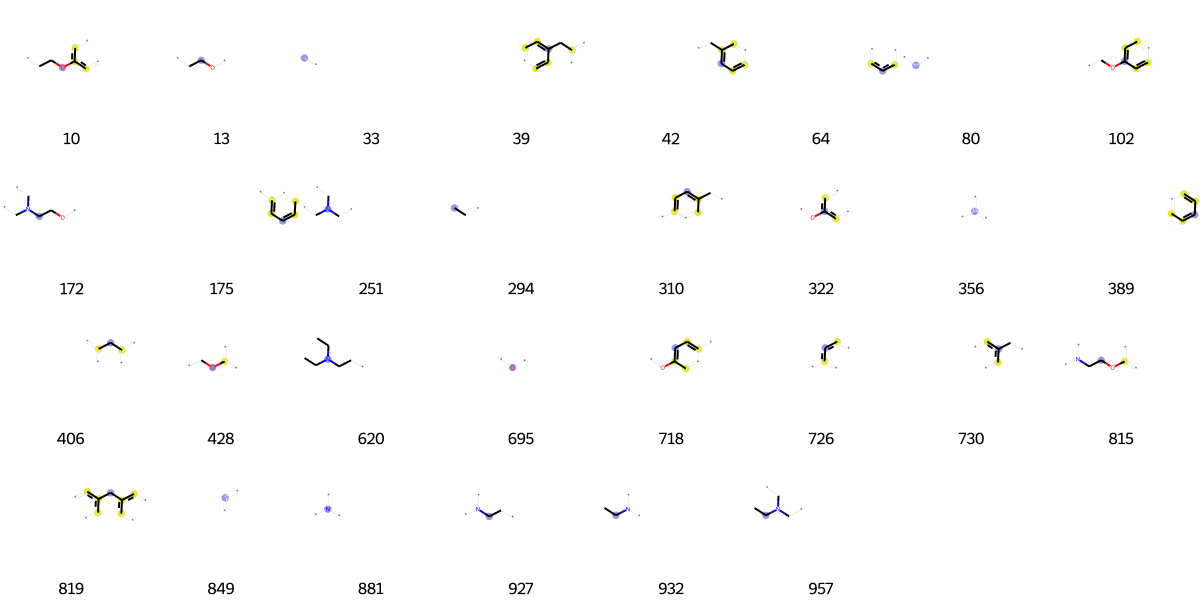

In [3515]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [3516]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 32,
 33,
 36,
 45,
 70,
 73,
 80,
 114,
 121,
 136,
 142,
 168,
 169,
 190,
 194,
 237,
 257,
 283,
 314,
 327,
 333,
 356,
 378,
 382,
 392,
 393,
 416,
 428,
 477,
 507,
 511,
 546,
 564,
 579,
 629,
 641,
 650,
 695,
 714,
 726,
 771,
 774,
 785,
 802,
 807,
 831,
 841,
 849,
 875,
 884,
 896,
 898,
 935,
 953,
 961,
 963]

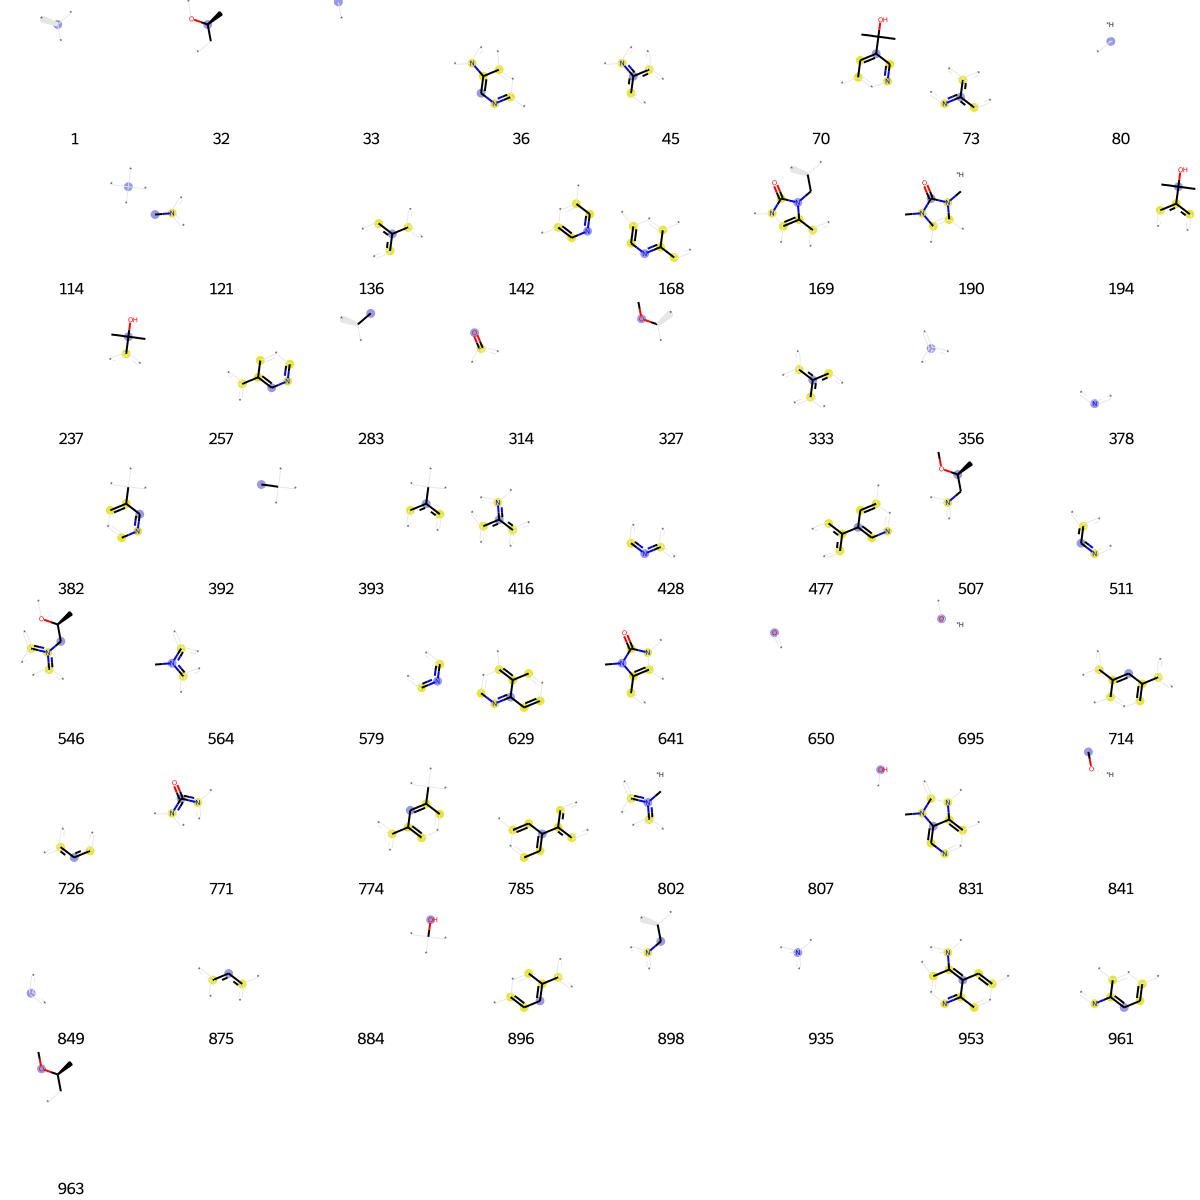

In [3517]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [3518]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 46,
 64,
 80,
 123,
 131,
 139,
 175,
 216,
 280,
 310,
 356,
 378,
 428,
 448,
 495,
 507,
 510,
 514,
 561,
 604,
 652,
 659,
 663,
 693,
 726,
 730,
 735,
 816,
 842,
 849,
 881,
 894,
 927,
 1007,
 1008]

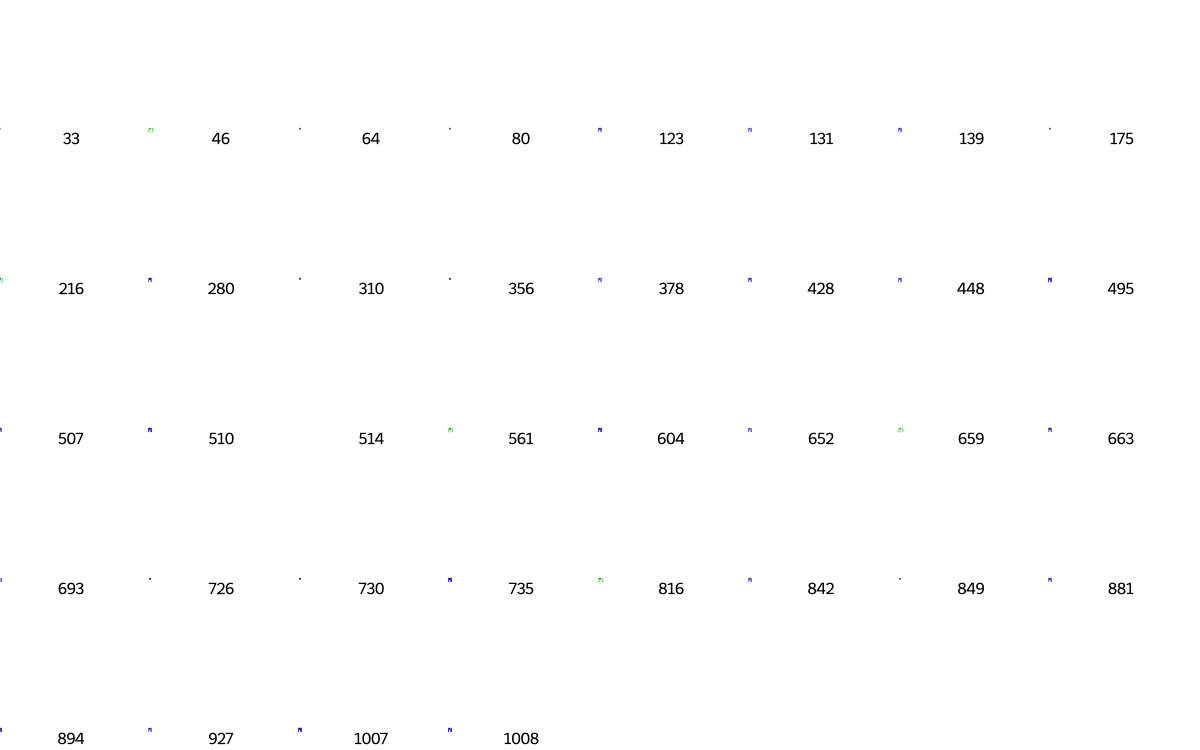

In [3519]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [3520]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[7,
 16,
 33,
 36,
 71,
 84,
 88,
 130,
 138,
 182,
 195,
 242,
 250,
 262,
 301,
 314,
 356,
 408,
 412,
 432,
 437,
 479,
 504,
 507,
 519,
 529,
 555,
 594,
 622,
 650,
 674,
 714,
 807,
 841,
 849,
 860,
 926,
 1019]

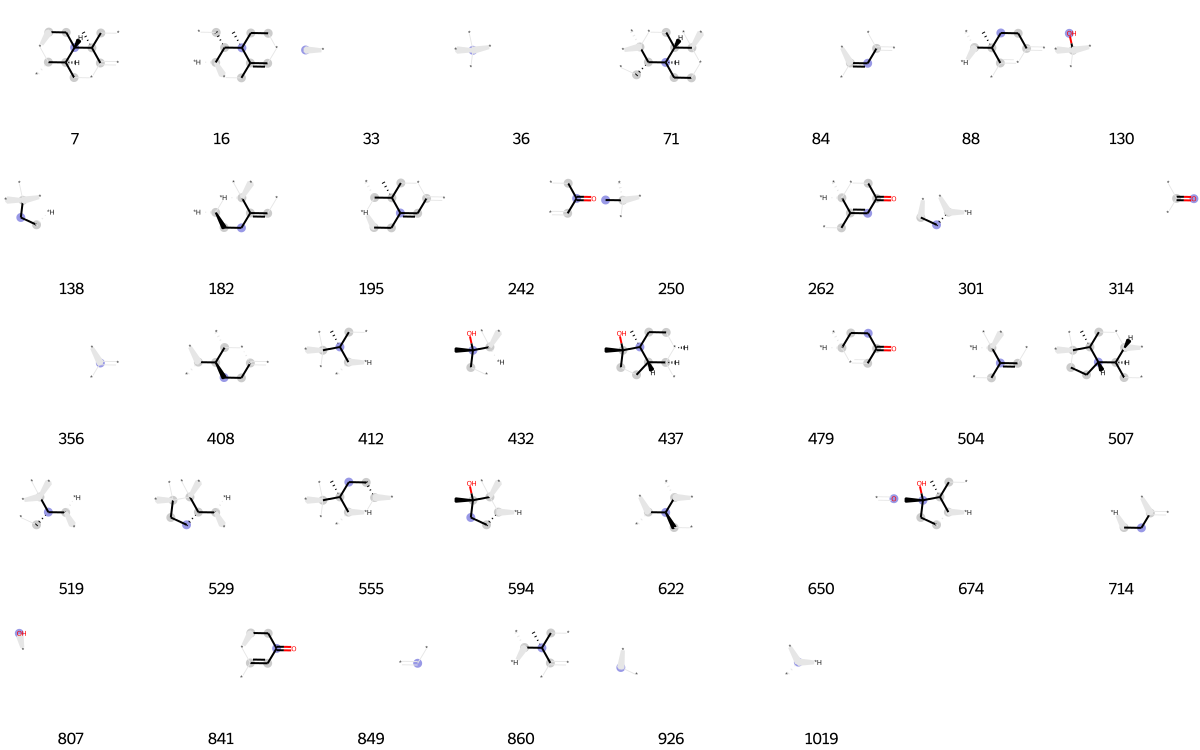

In [3521]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [3522]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 15,
 33,
 64,
 73,
 80,
 82,
 121,
 147,
 212,
 221,
 222,
 232,
 237,
 249,
 283,
 333,
 335,
 356,
 378,
 386,
 407,
 411,
 428,
 433,
 435,
 456,
 469,
 484,
 512,
 565,
 581,
 598,
 613,
 624,
 644,
 650,
 695,
 706,
 726,
 760,
 776,
 780,
 807,
 831,
 841,
 849,
 875,
 891,
 893,
 926,
 935,
 946,
 980,
 985,
 1002,
 1009]

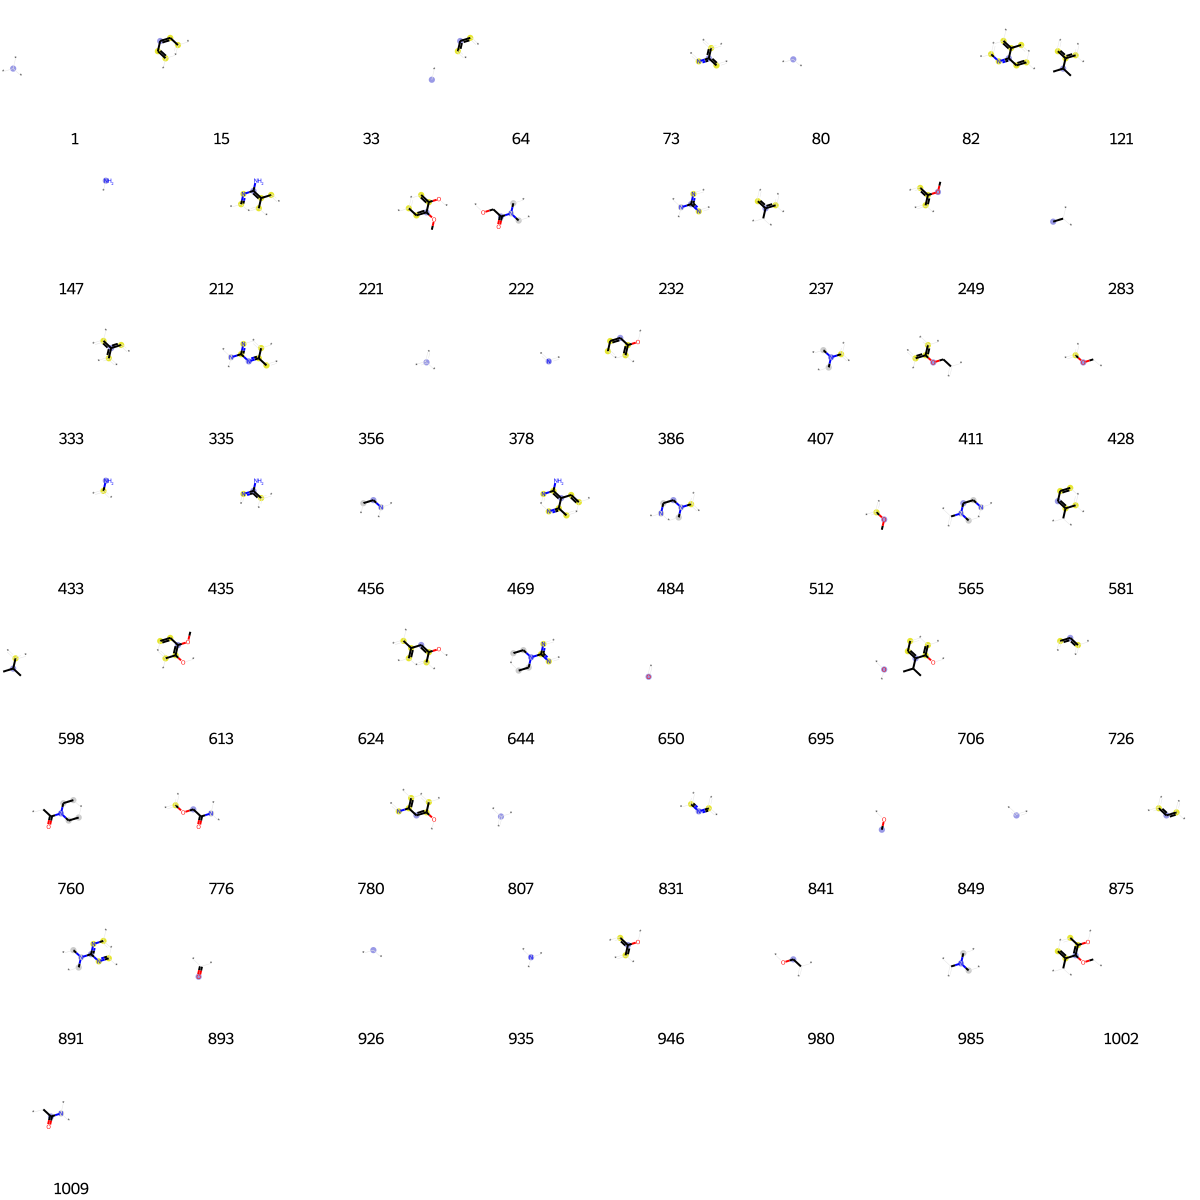

In [3523]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [3524]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[13,
 80,
 158,
 210,
 222,
 233,
 432,
 463,
 492,
 576,
 610,
 656,
 740,
 807,
 820,
 897,
 1019]

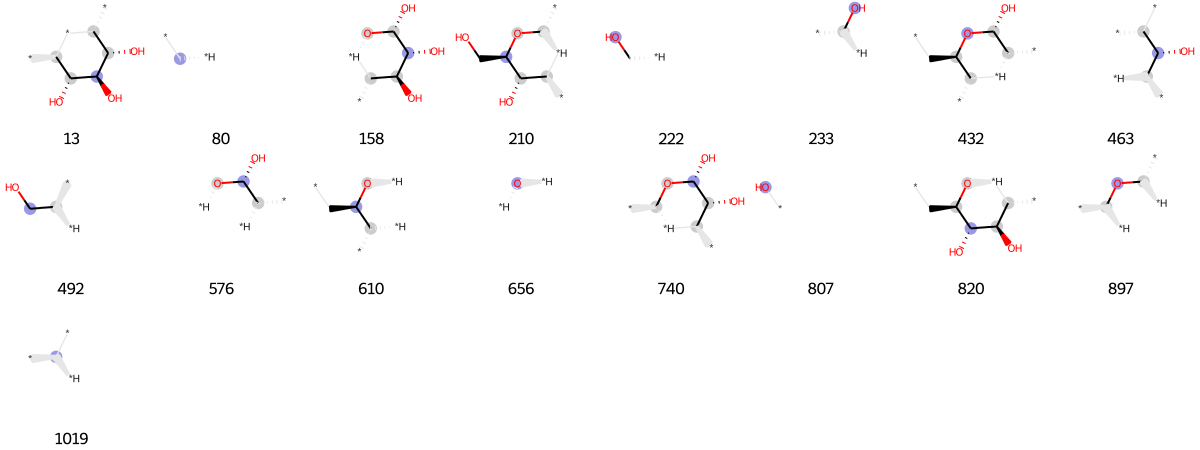

In [3525]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [3526]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[128,
 140,
 144,
 147,
 279,
 307,
 319,
 331,
 350,
 356,
 433,
 452,
 502,
 650,
 715,
 726,
 780,
 807,
 849,
 883,
 888,
 893,
 900]

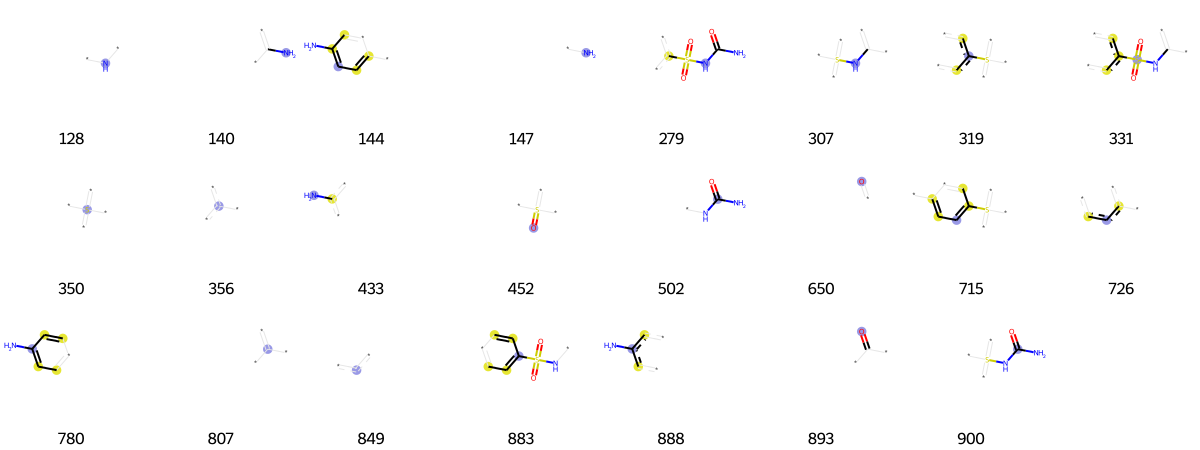

In [3527]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [3528]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[4,
 33,
 36,
 45,
 46,
 64,
 90,
 139,
 158,
 175,
 197,
 244,
 250,
 261,
 264,
 267,
 268,
 289,
 314,
 322,
 333,
 355,
 356,
 361,
 362,
 389,
 416,
 443,
 463,
 468,
 521,
 545,
 549,
 560,
 566,
 587,
 633,
 644,
 650,
 656,
 677,
 678,
 689,
 695,
 702,
 720,
 723,
 726,
 796,
 807,
 825,
 841,
 842,
 849,
 881,
 893,
 895,
 926,
 935,
 937,
 950,
 960,
 961,
 967,
 983,
 996,
 1019]

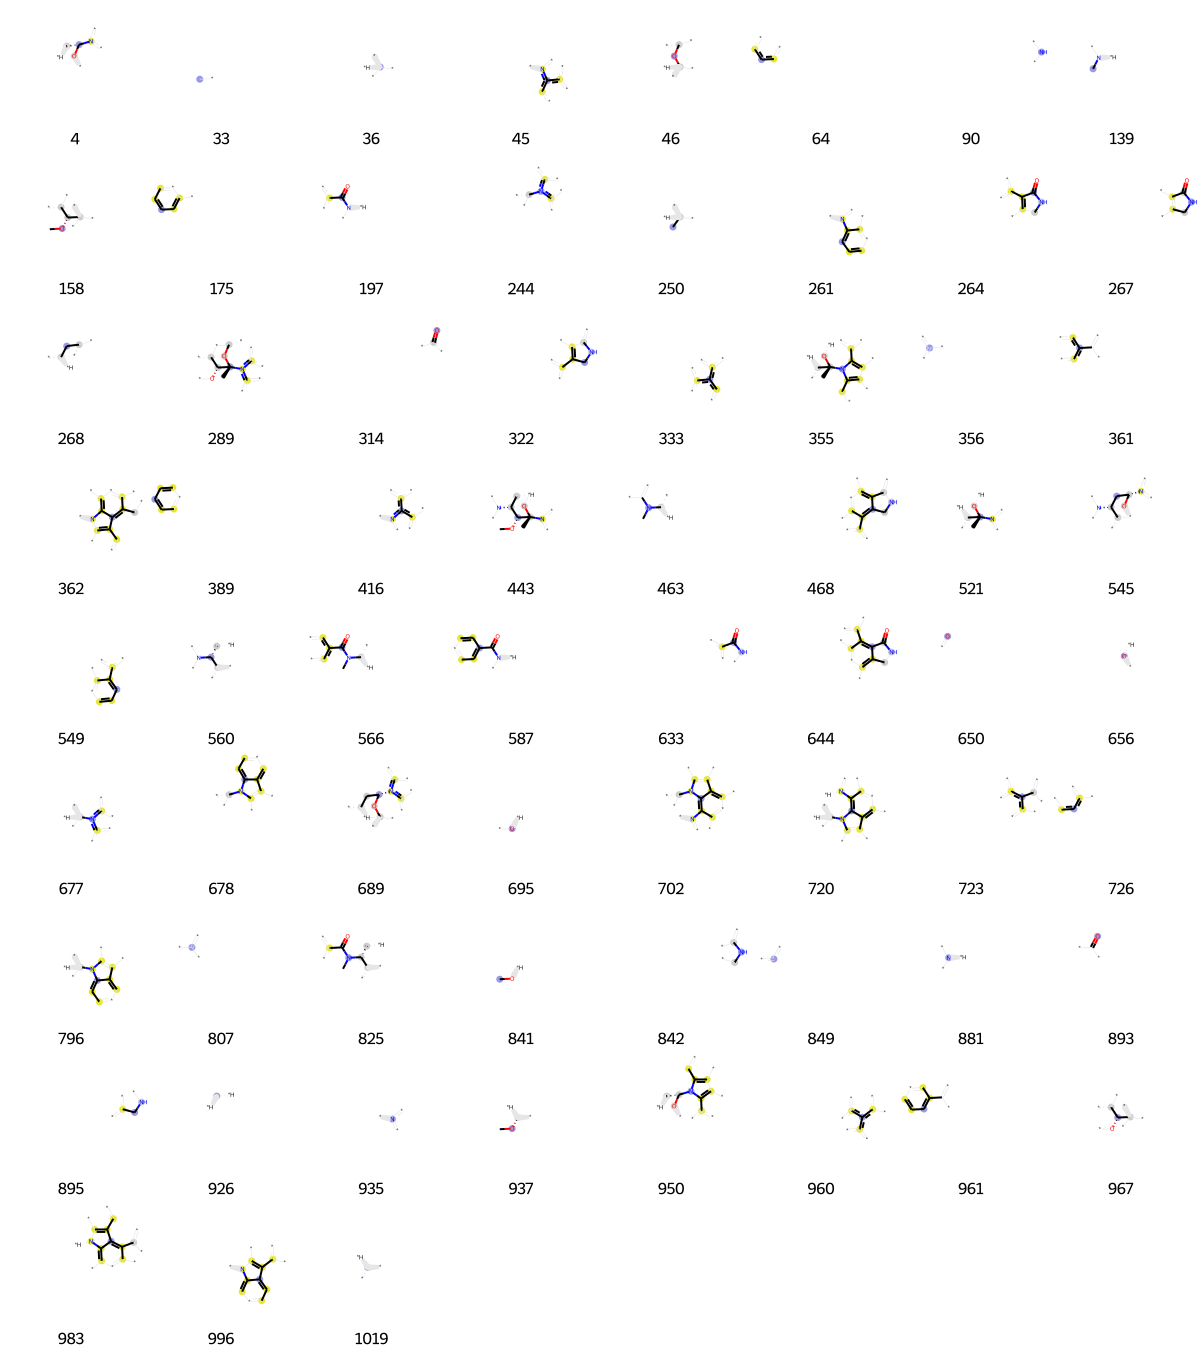

In [3529]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [3530]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 33,
 64,
 80,
 114,
 118,
 140,
 147,
 175,
 283,
 284,
 356,
 389,
 393,
 414,
 438,
 479,
 586,
 625,
 628,
 633,
 650,
 726,
 780,
 787,
 807,
 849,
 893,
 913,
 914,
 924,
 952,
 968,
 993]

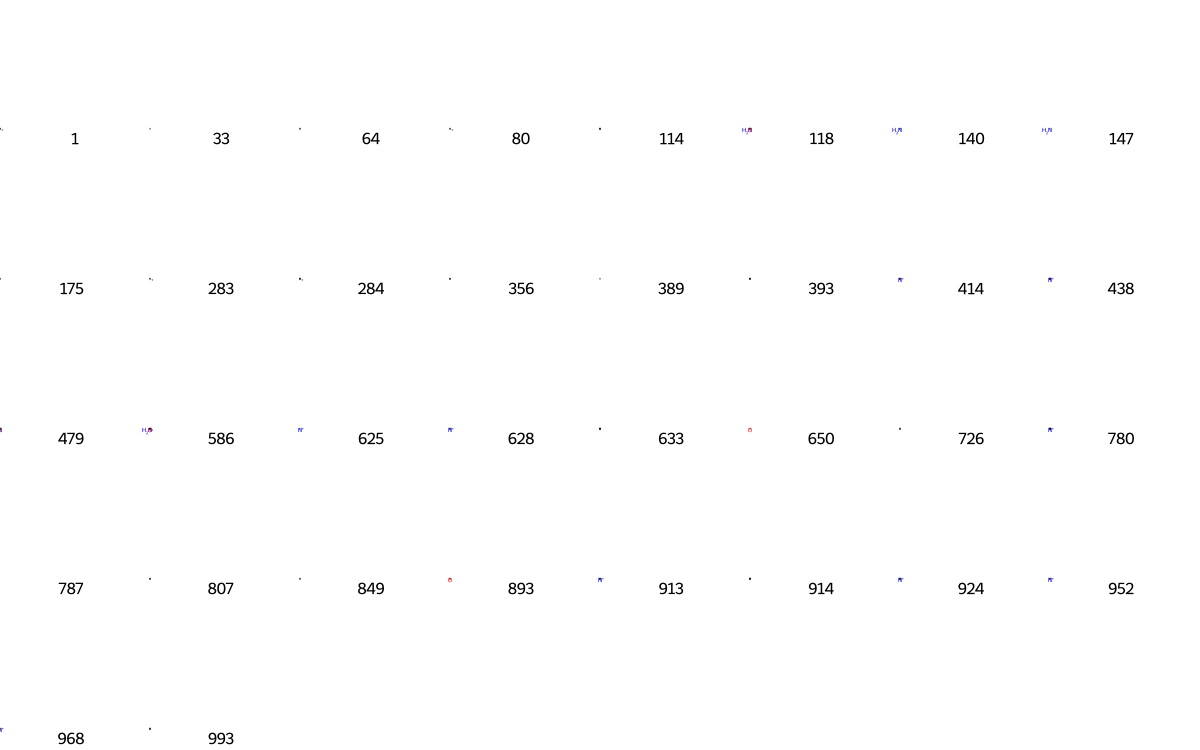

In [3531]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [3532]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[64,
 80,
 142,
 175,
 271,
 310,
 314,
 321,
 352,
 356,
 366,
 378,
 449,
 452,
 475,
 530,
 561,
 588,
 623,
 650,
 659,
 666,
 726,
 730,
 741,
 744,
 849,
 875,
 879,
 935,
 950,
 967,
 982,
 984]

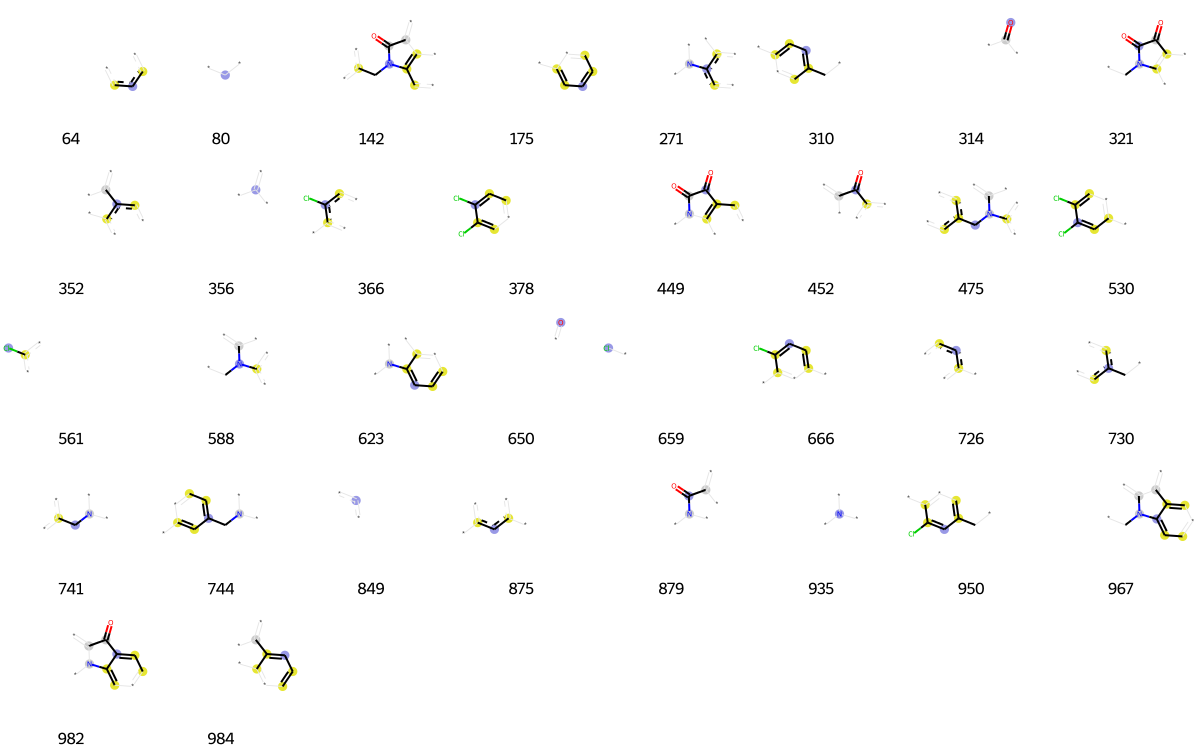

In [3533]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [3534]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[3,
 33,
 80,
 94,
 118,
 140,
 221,
 249,
 310,
 333,
 356,
 378,
 406,
 428,
 429,
 512,
 514,
 624,
 695,
 697,
 722,
 726,
 730,
 787,
 810,
 831,
 836,
 841,
 842,
 849,
 873,
 875,
 910,
 944,
 946]

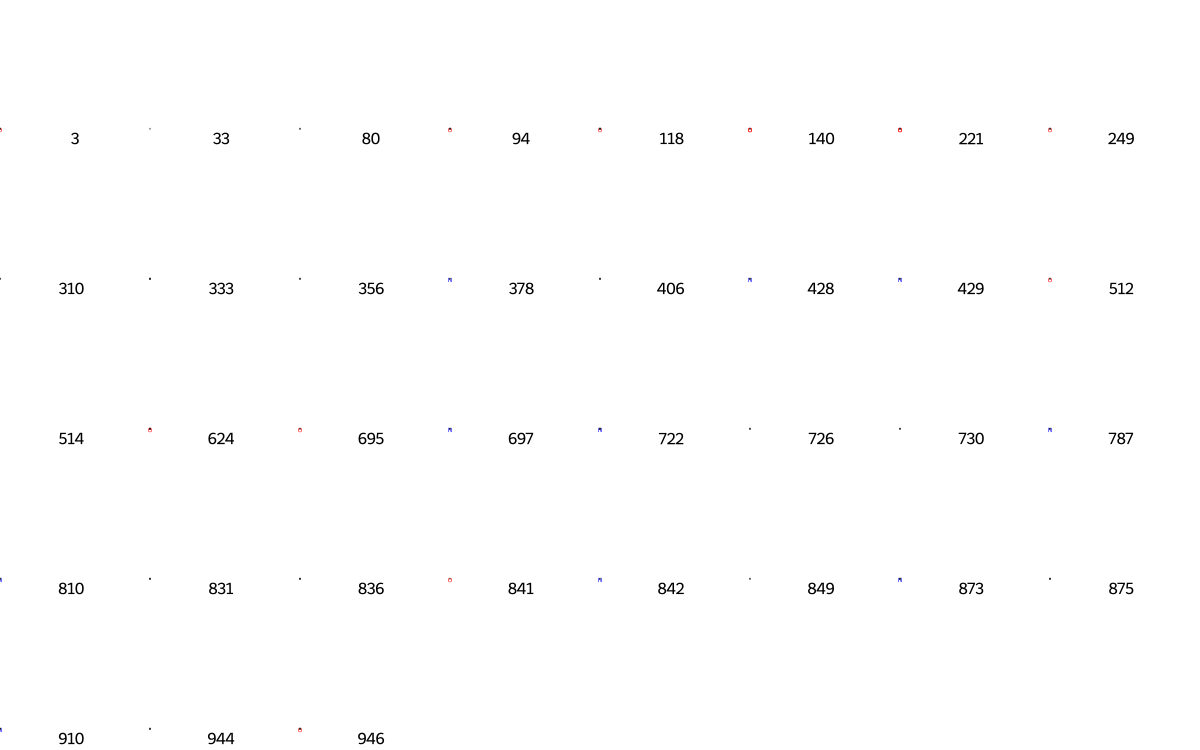

In [3535]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [3536]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[21,
 23,
 64,
 80,
 94,
 104,
 128,
 175,
 191,
 200,
 219,
 310,
 356,
 366,
 378,
 389,
 423,
 456,
 491,
 499,
 500,
 530,
 561,
 650,
 659,
 666,
 672,
 726,
 730,
 807,
 819,
 843,
 849,
 875,
 882,
 893,
 950,
 967]

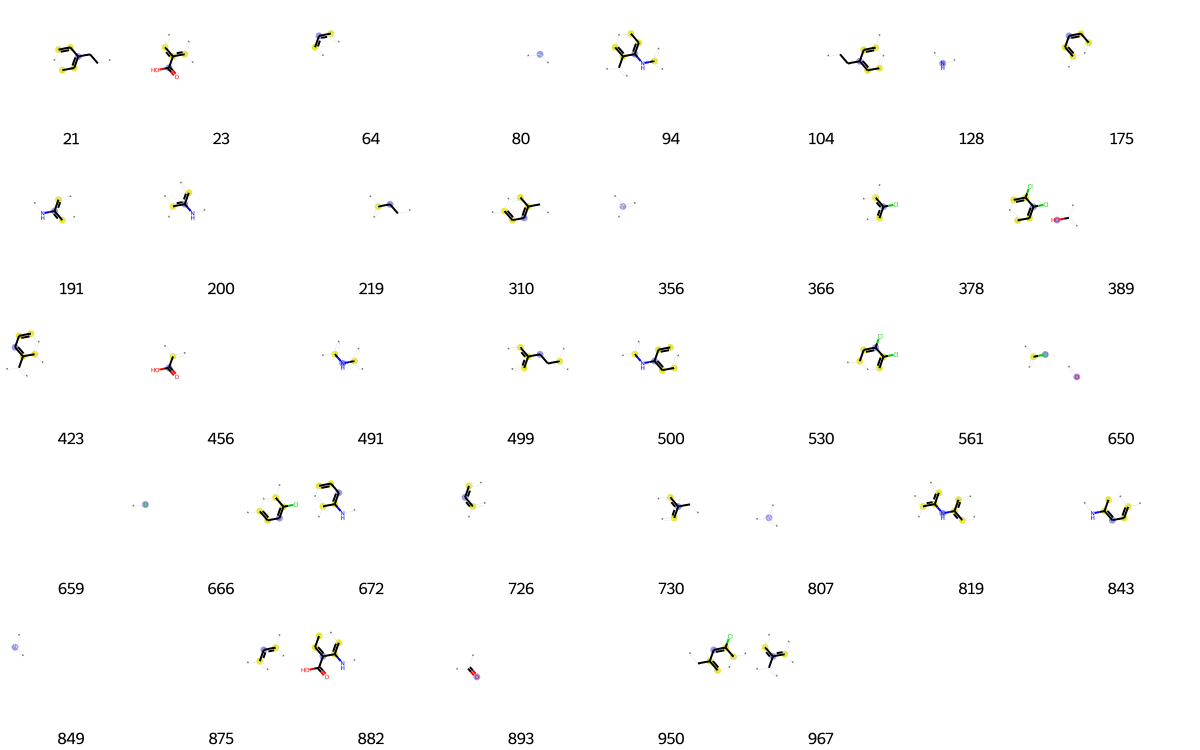

In [3537]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [3538]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 14,
 28,
 33,
 36,
 64,
 80,
 101,
 107,
 108,
 128,
 131,
 138,
 155,
 171,
 175,
 249,
 255,
 272,
 306,
 356,
 378,
 428,
 448,
 483,
 492,
 506,
 512,
 543,
 554,
 611,
 614,
 616,
 619,
 631,
 635,
 656,
 667,
 675,
 695,
 703,
 726,
 770,
 795,
 818,
 826,
 841,
 842,
 849,
 926,
 946,
 950,
 966,
 1004,
 1017]

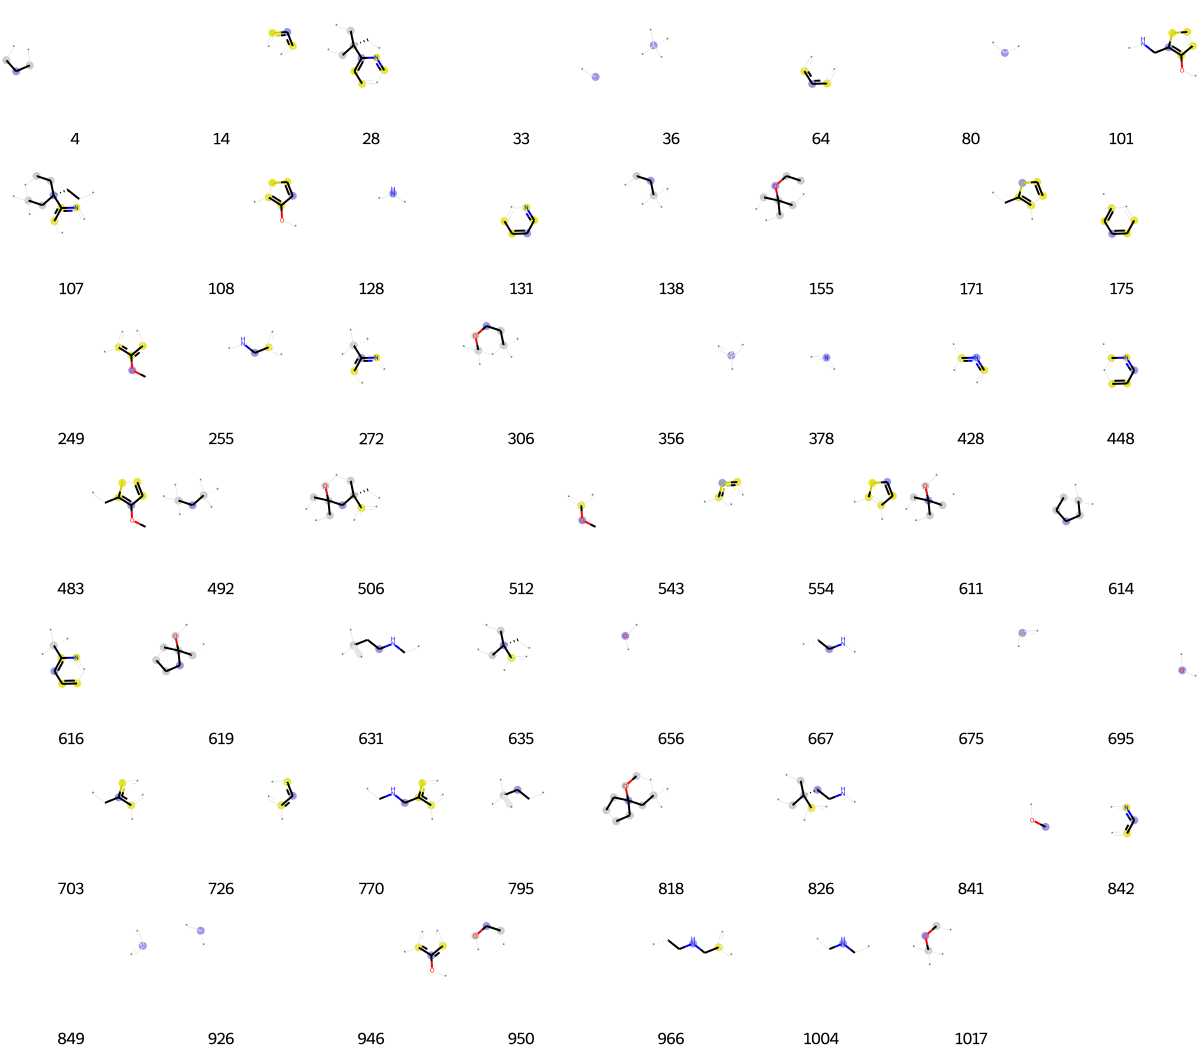

In [3539]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [3540]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[6,
 8,
 10,
 13,
 33,
 42,
 63,
 64,
 80,
 102,
 104,
 123,
 128,
 147,
 175,
 197,
 204,
 205,
 214,
 240,
 319,
 322,
 350,
 356,
 367,
 389,
 407,
 428,
 452,
 473,
 486,
 490,
 507,
 552,
 575,
 580,
 607,
 650,
 656,
 660,
 667,
 695,
 698,
 715,
 718,
 726,
 728,
 730,
 740,
 766,
 784,
 799,
 807,
 815,
 831,
 849,
 875,
 878,
 881,
 888,
 893,
 922,
 929,
 967,
 983]

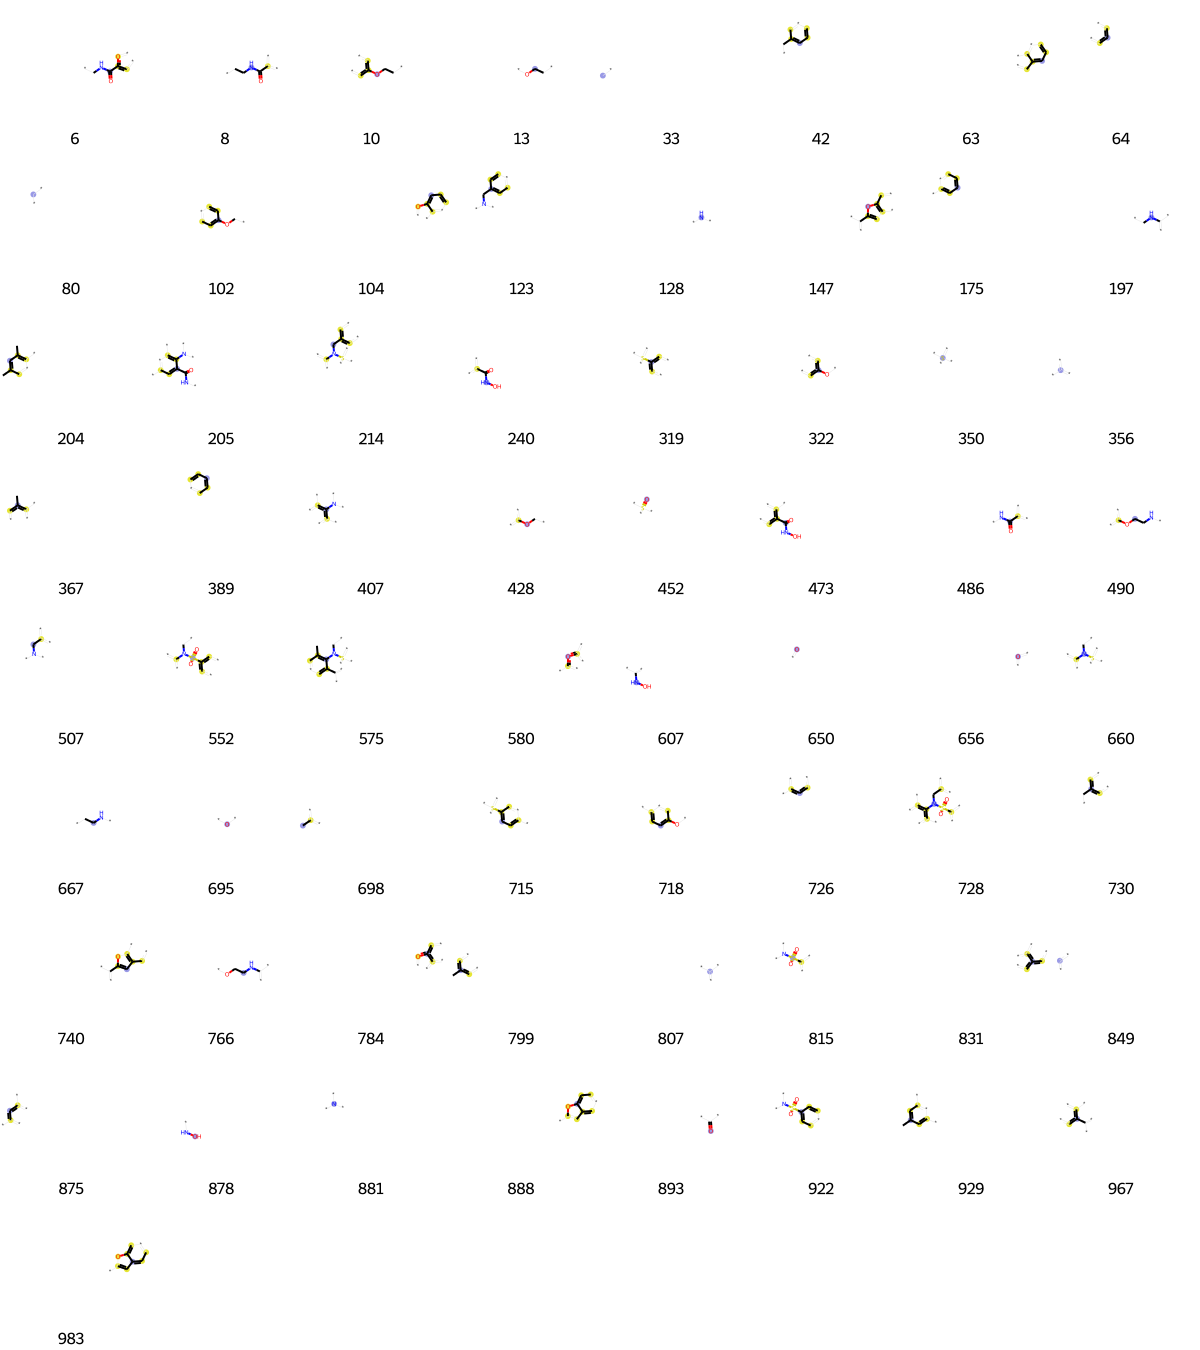

In [3541]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [3542]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 12,
 33,
 90,
 134,
 147,
 227,
 239,
 283,
 297,
 301,
 314,
 334,
 356,
 378,
 433,
 470,
 484,
 505,
 514,
 650,
 653,
 661,
 669,
 697,
 721,
 784,
 807,
 828,
 831,
 842,
 858,
 896,
 918,
 926,
 935,
 950,
 1019]

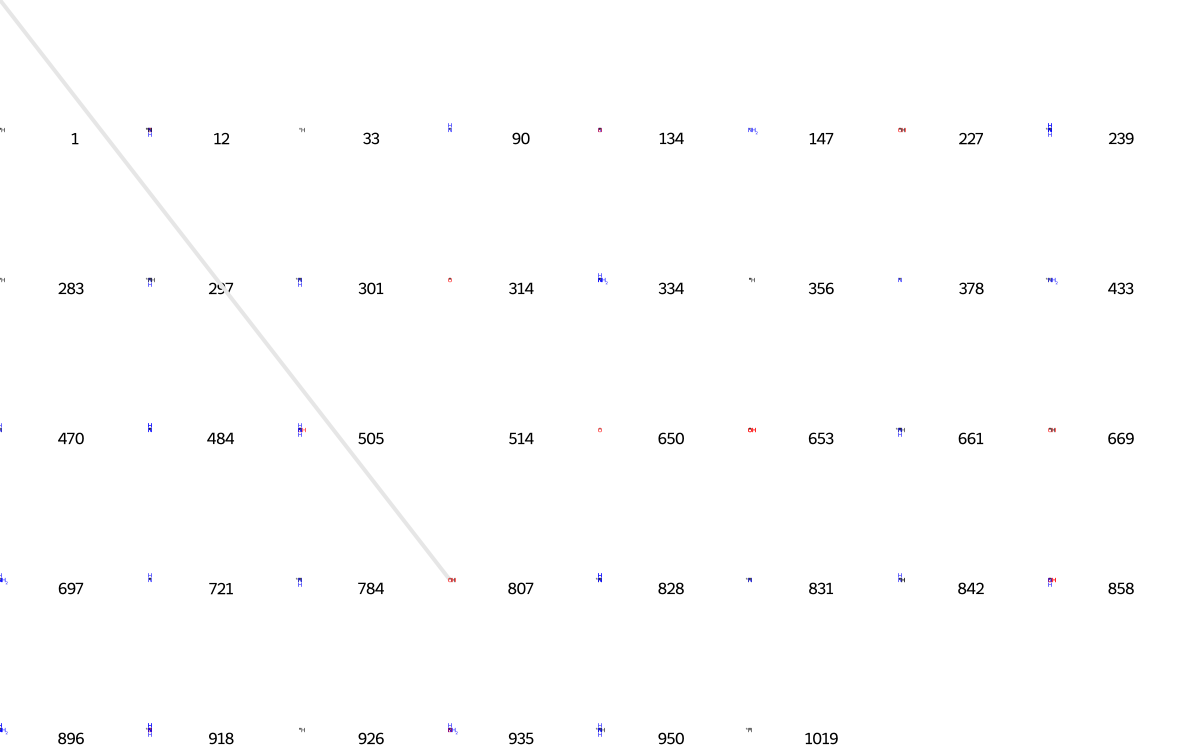

In [3543]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [3544]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 14,
 15,
 21,
 25,
 33,
 64,
 77,
 95,
 121,
 128,
 136,
 164,
 191,
 207,
 212,
 222,
 252,
 319,
 329,
 350,
 352,
 356,
 378,
 407,
 452,
 456,
 484,
 491,
 495,
 496,
 515,
 526,
 558,
 562,
 595,
 643,
 650,
 672,
 687,
 692,
 696,
 703,
 715,
 726,
 783,
 801,
 831,
 849,
 875,
 896,
 910,
 926,
 932,
 935,
 984]

In [3545]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 32,
 33,
 43,
 44,
 59,
 90,
 125,
 130,
 136,
 147,
 155,
 194,
 216,
 226,
 283,
 284,
 301,
 305,
 350,
 356,
 366,
 378,
 409,
 428,
 433,
 435,
 463,
 464,
 477,
 492,
 511,
 538,
 561,
 589,
 602,
 606,
 638,
 659,
 664,
 666,
 695,
 699,
 712,
 726,
 816,
 835,
 845,
 849,
 858,
 873,
 875,
 886,
 904,
 926,
 935,
 946,
 965,
 1011,
 1019]

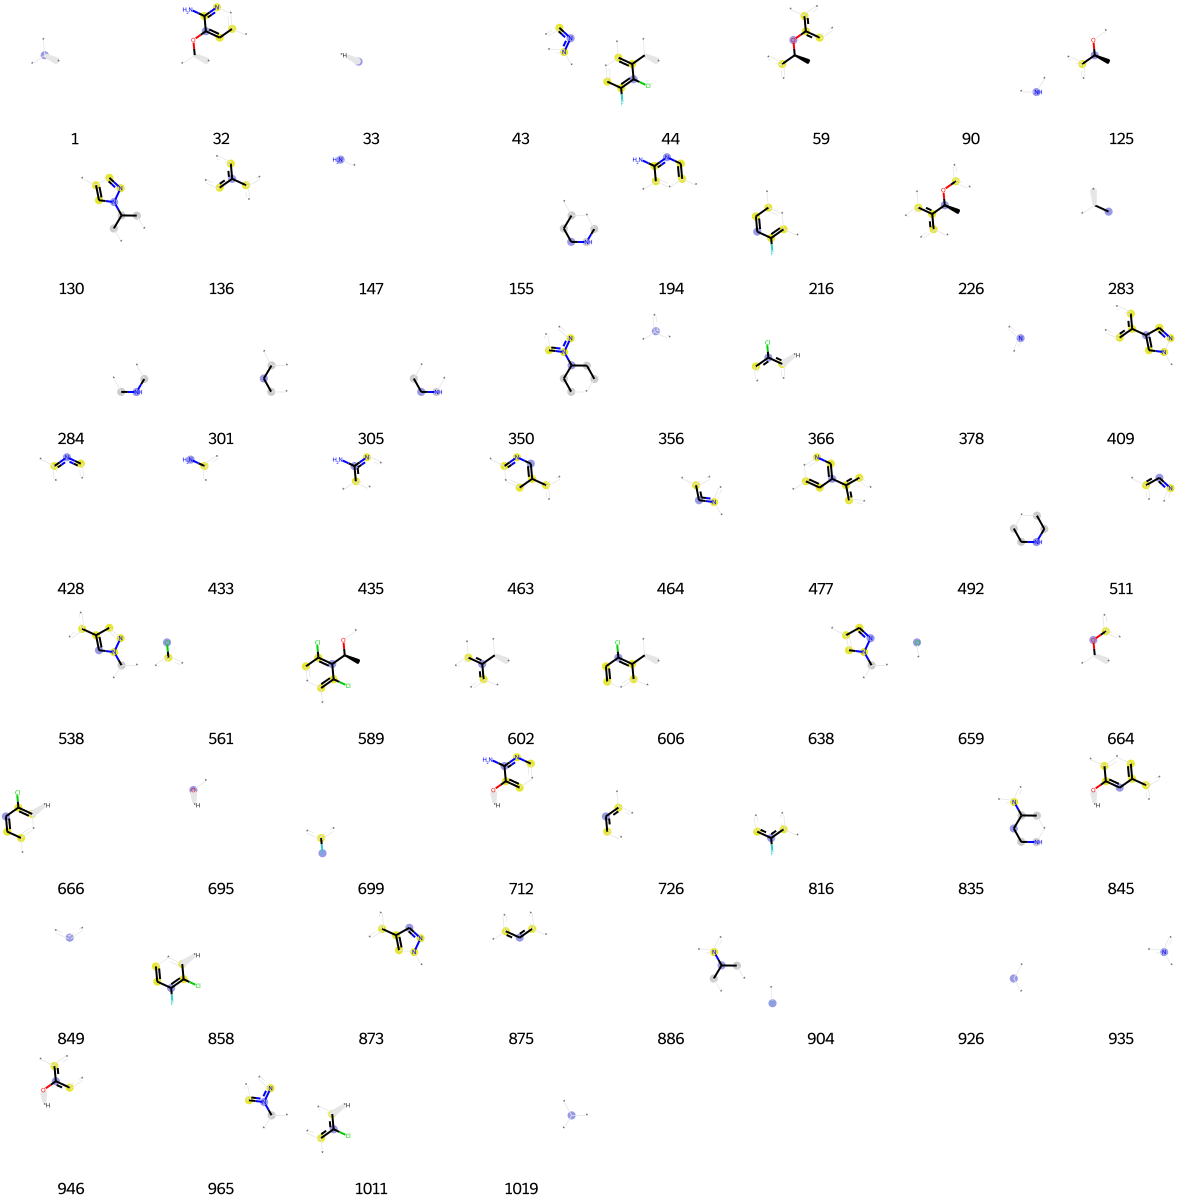

In [3546]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [3547]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[4,
 19,
 33,
 64,
 80,
 90,
 92,
 112,
 122,
 301,
 305,
 335,
 350,
 353,
 356,
 378,
 386,
 428,
 448,
 483,
 568,
 695,
 698,
 709,
 726,
 742,
 819,
 842,
 849,
 870,
 888,
 926,
 946,
 1019]

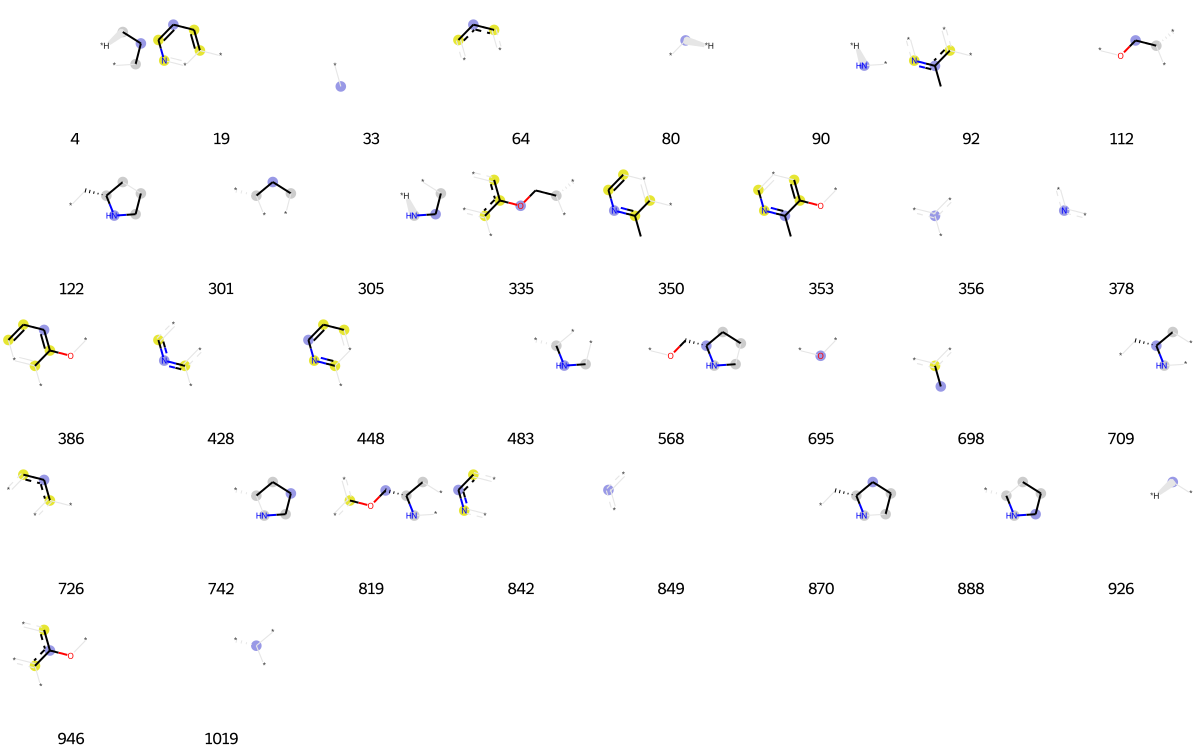

In [3548]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [3549]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[41,
 42,
 64,
 74,
 80,
 84,
 114,
 128,
 198,
 200,
 209,
 236,
 260,
 277,
 288,
 356,
 366,
 393,
 405,
 429,
 456,
 474,
 480,
 498,
 500,
 561,
 565,
 614,
 621,
 641,
 650,
 656,
 659,
 666,
 726,
 730,
 767,
 787,
 792,
 807,
 809,
 849,
 875,
 893,
 896,
 902,
 904,
 924,
 926,
 935,
 942,
 985]

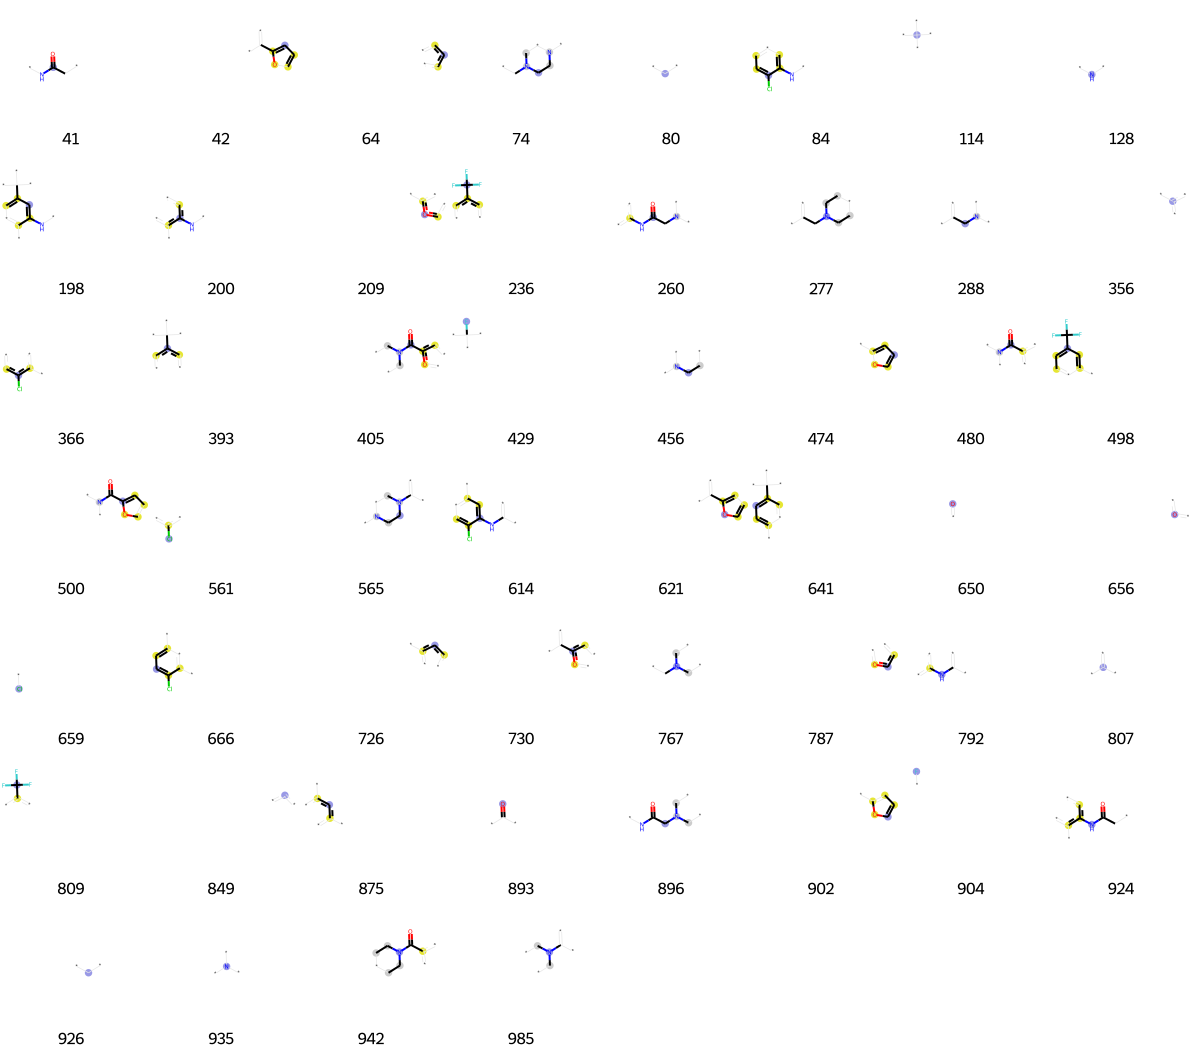

In [3550]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [3551]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[15,
 64,
 131,
 230,
 329,
 356,
 463,
 486,
 538,
 646,
 694,
 699,
 725,
 726,
 800,
 849,
 864,
 875,
 904,
 941,
 1009]

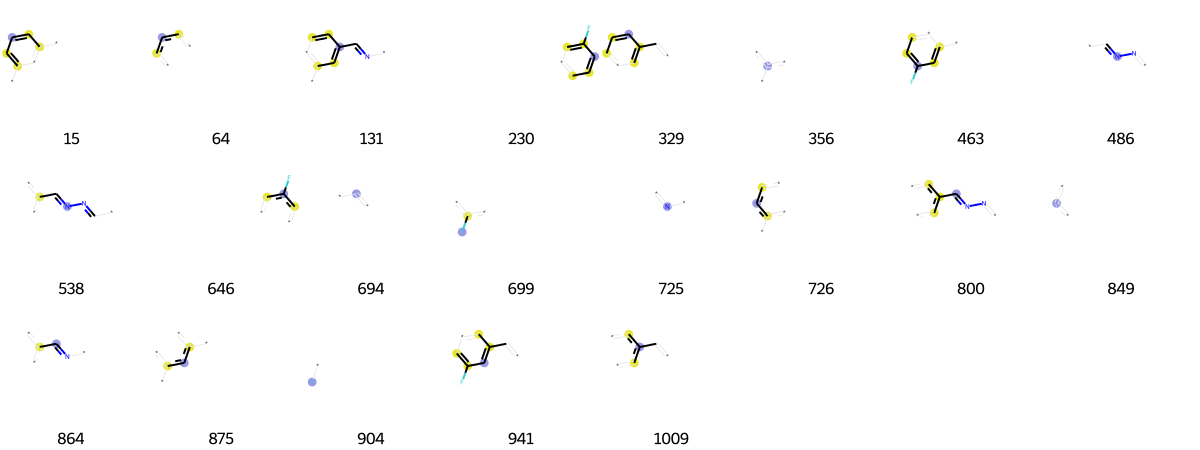

In [3552]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [3553]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[33,
 80,
 136,
 196,
 248,
 322,
 323,
 325,
 356,
 361,
 371,
 378,
 389,
 471,
 476,
 512,
 515,
 518,
 624,
 650,
 656,
 695,
 699,
 713,
 718,
 723,
 726,
 781,
 799,
 807,
 831,
 841,
 849,
 893,
 896,
 914]

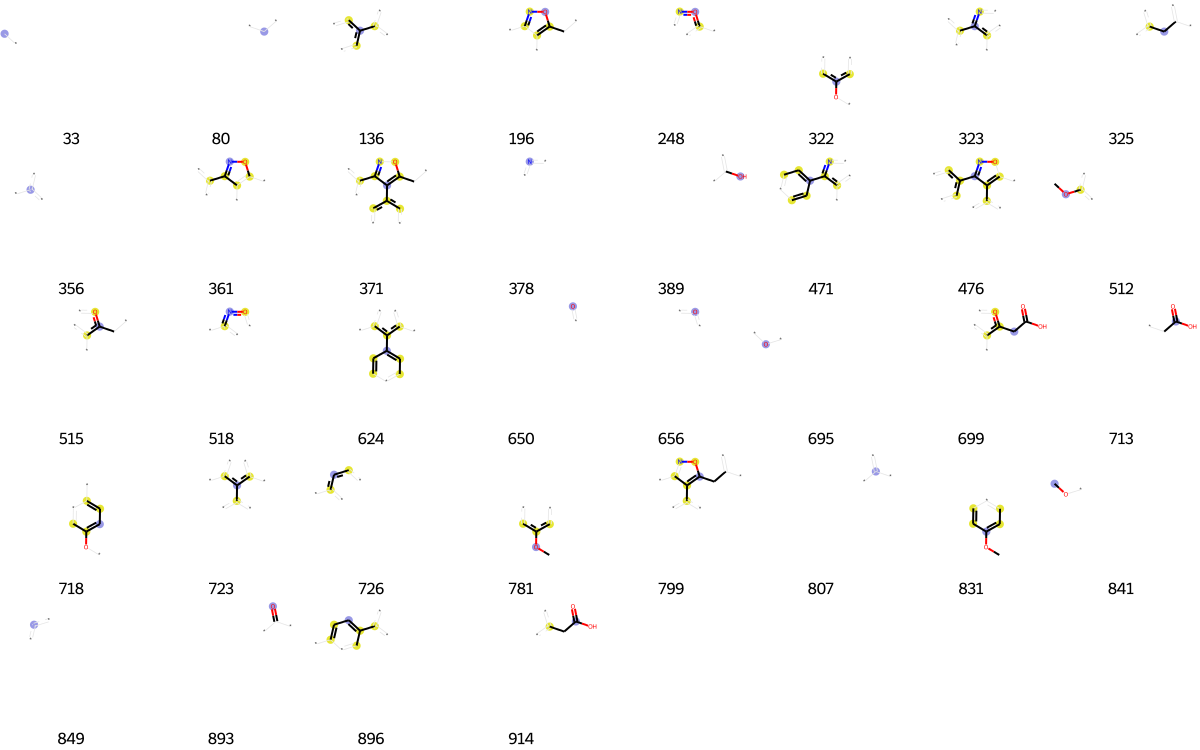

In [3554]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [3555]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[64,
 80,
 90,
 114,
 119,
 121,
 136,
 160,
 175,
 219,
 225,
 296,
 309,
 325,
 328,
 333,
 355,
 356,
 361,
 364,
 389,
 456,
 463,
 476,
 502,
 503,
 516,
 521,
 637,
 650,
 653,
 673,
 714,
 726,
 728,
 736,
 757,
 767,
 799,
 806,
 807,
 849,
 855,
 875,
 887,
 893,
 913,
 915,
 926,
 935]

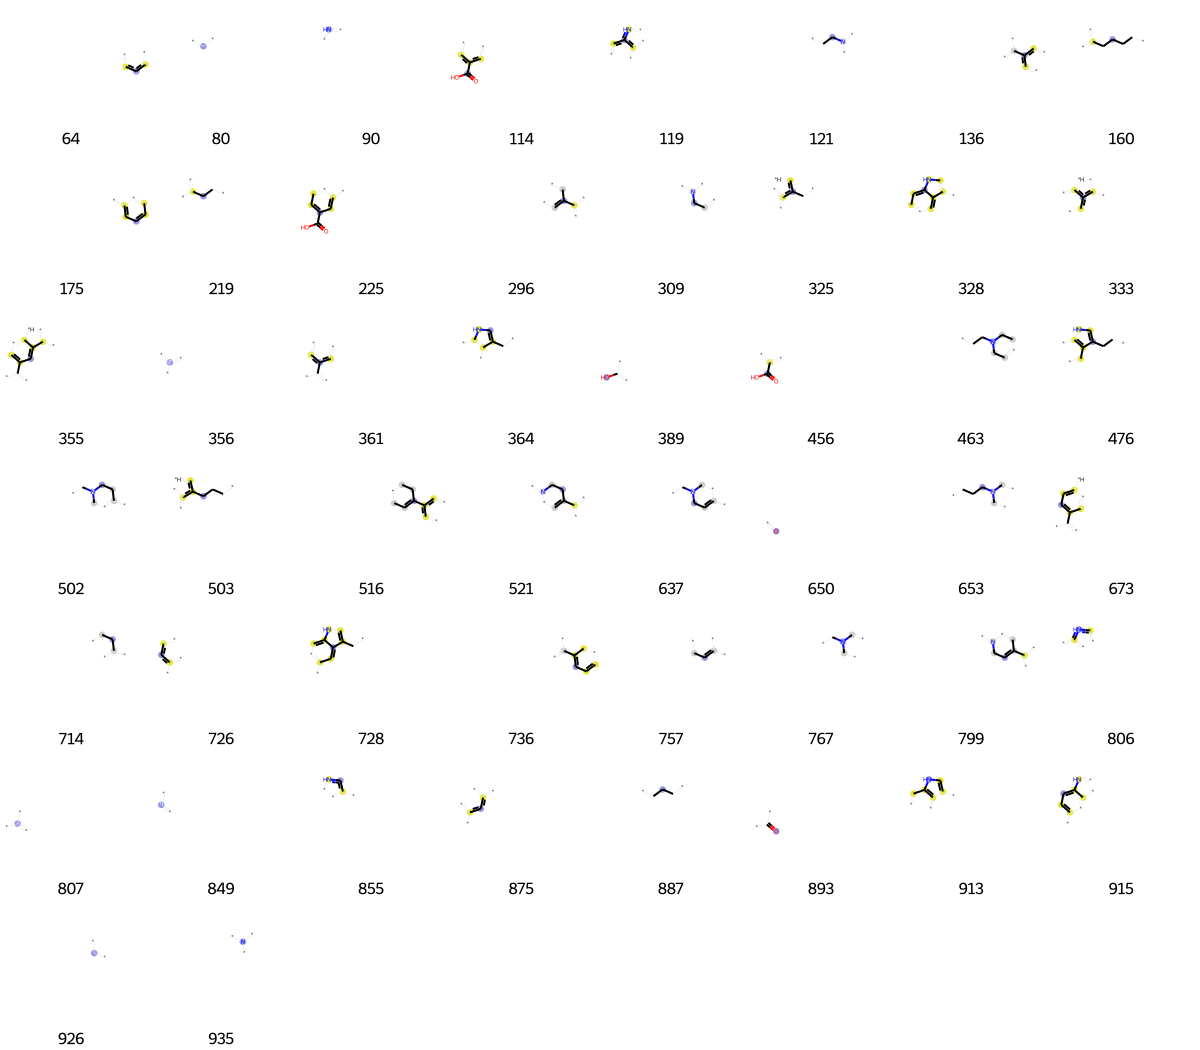

In [3556]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [3557]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[14,
 15,
 33,
 46,
 64,
 111,
 121,
 128,
 141,
 191,
 207,
 212,
 233,
 239,
 249,
 258,
 310,
 322,
 333,
 356,
 367,
 378,
 381,
 400,
 407,
 428,
 449,
 456,
 458,
 475,
 484,
 491,
 500,
 512,
 541,
 558,
 562,
 635,
 650,
 680,
 687,
 695,
 698,
 705,
 718,
 726,
 766,
 781,
 787,
 795,
 801,
 807,
 831,
 841,
 842,
 843,
 849,
 875,
 881,
 893,
 894,
 926,
 935,
 946,
 948,
 965,
 975,
 994]

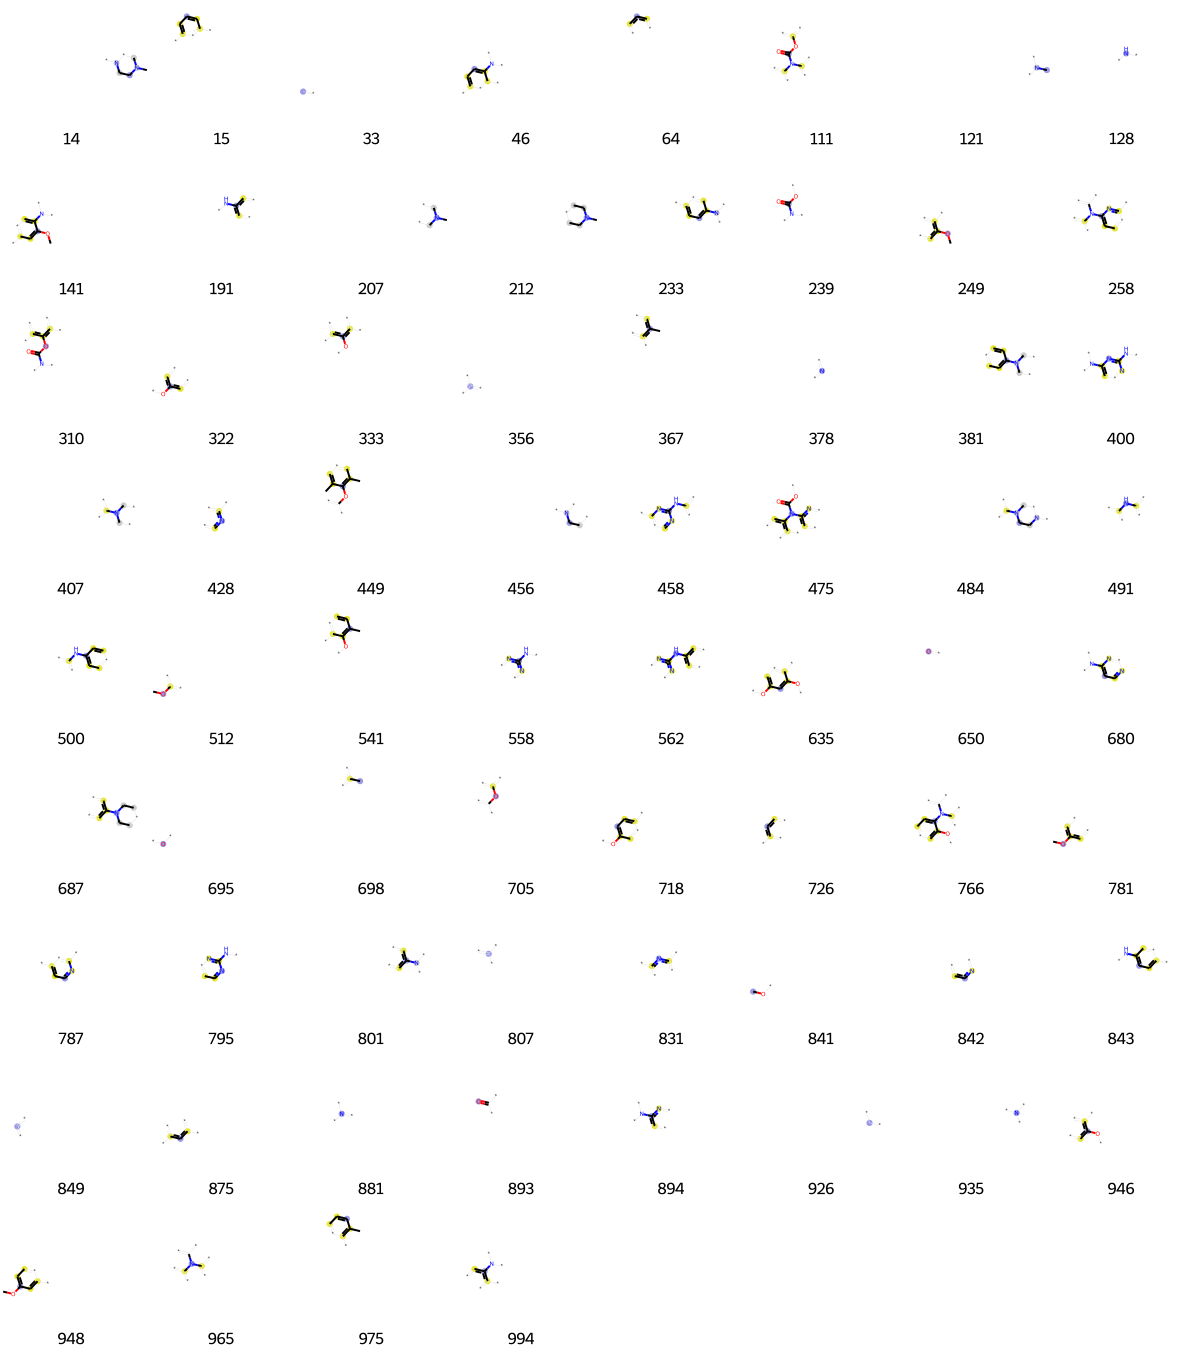

In [3558]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [3559]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[9,
 16,
 33,
 73,
 90,
 105,
 119,
 128,
 170,
 260,
 356,
 361,
 378,
 386,
 535,
 594,
 639,
 646,
 650,
 673,
 695,
 699,
 721,
 726,
 734,
 751,
 767,
 790,
 792,
 807,
 831,
 841,
 849,
 875,
 884,
 893,
 904,
 915,
 974,
 1011]

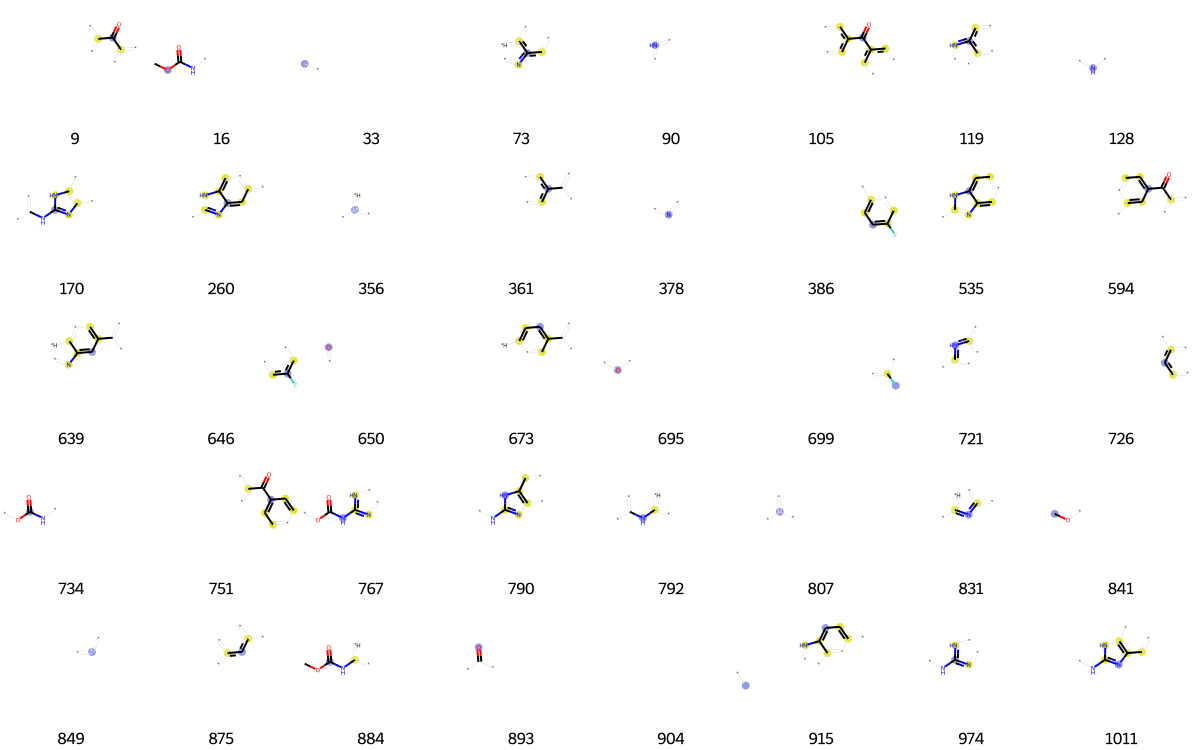

In [3560]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [3561]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 14,
 26,
 33,
 36,
 39,
 87,
 94,
 119,
 123,
 138,
 140,
 226,
 233,
 248,
 249,
 250,
 301,
 336,
 337,
 356,
 360,
 389,
 407,
 416,
 484,
 505,
 512,
 524,
 556,
 650,
 674,
 695,
 726,
 790,
 807,
 841,
 849,
 875,
 890,
 893,
 926,
 946,
 974,
 999,
 1019]

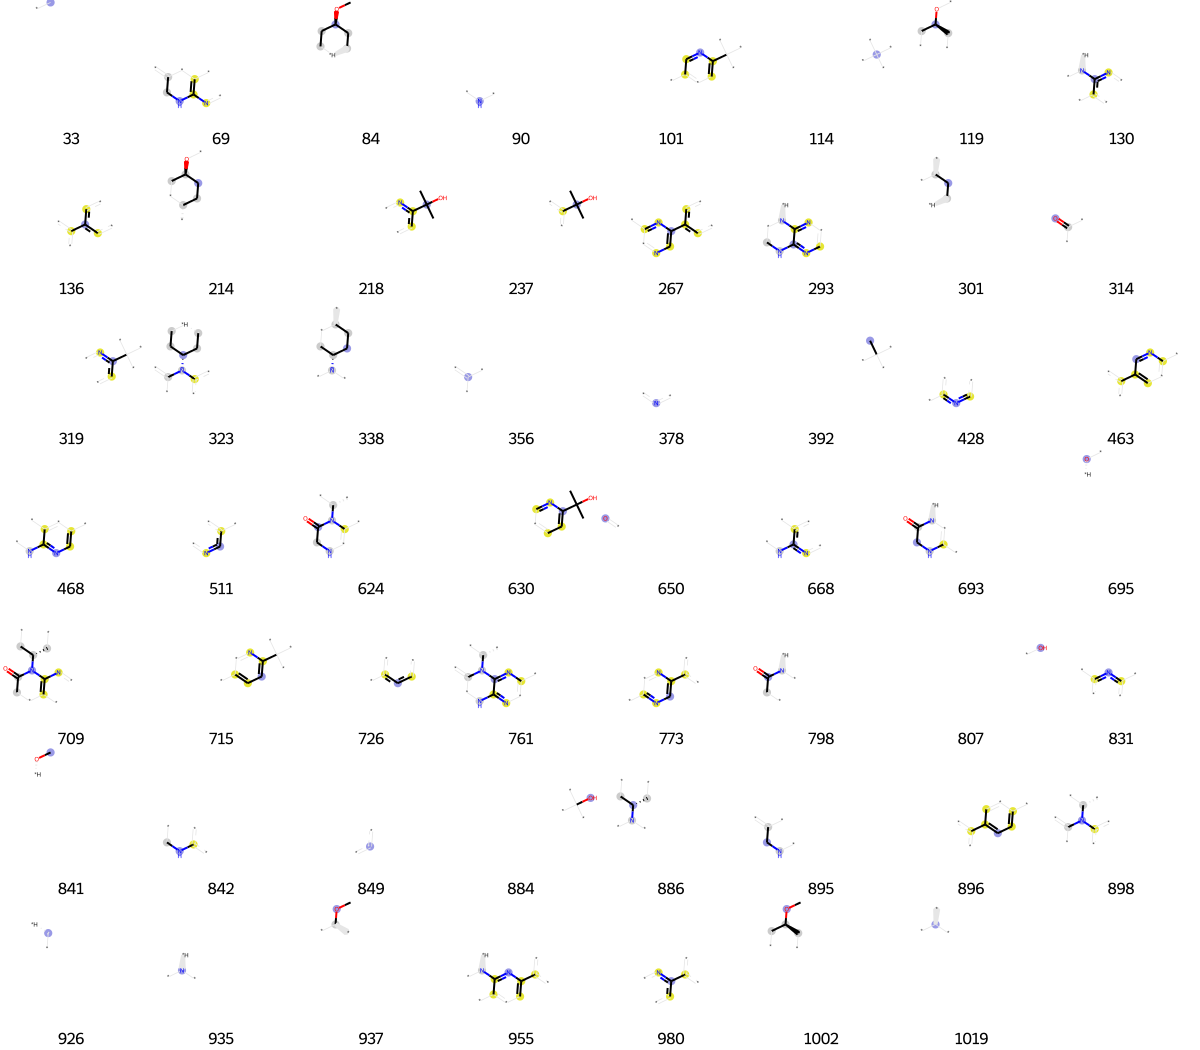

In [3562]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [3563]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[31,
 33,
 60,
 80,
 90,
 119,
 128,
 197,
 201,
 257,
 294,
 318,
 322,
 328,
 331,
 333,
 356,
 389,
 420,
 442,
 508,
 512,
 524,
 591,
 592,
 623,
 650,
 667,
 670,
 682,
 694,
 695,
 718,
 725,
 726,
 781,
 794,
 806,
 807,
 841,
 843,
 849,
 852,
 855,
 864,
 875,
 887,
 893,
 913,
 915,
 924,
 948,
 961,
 976,
 994]

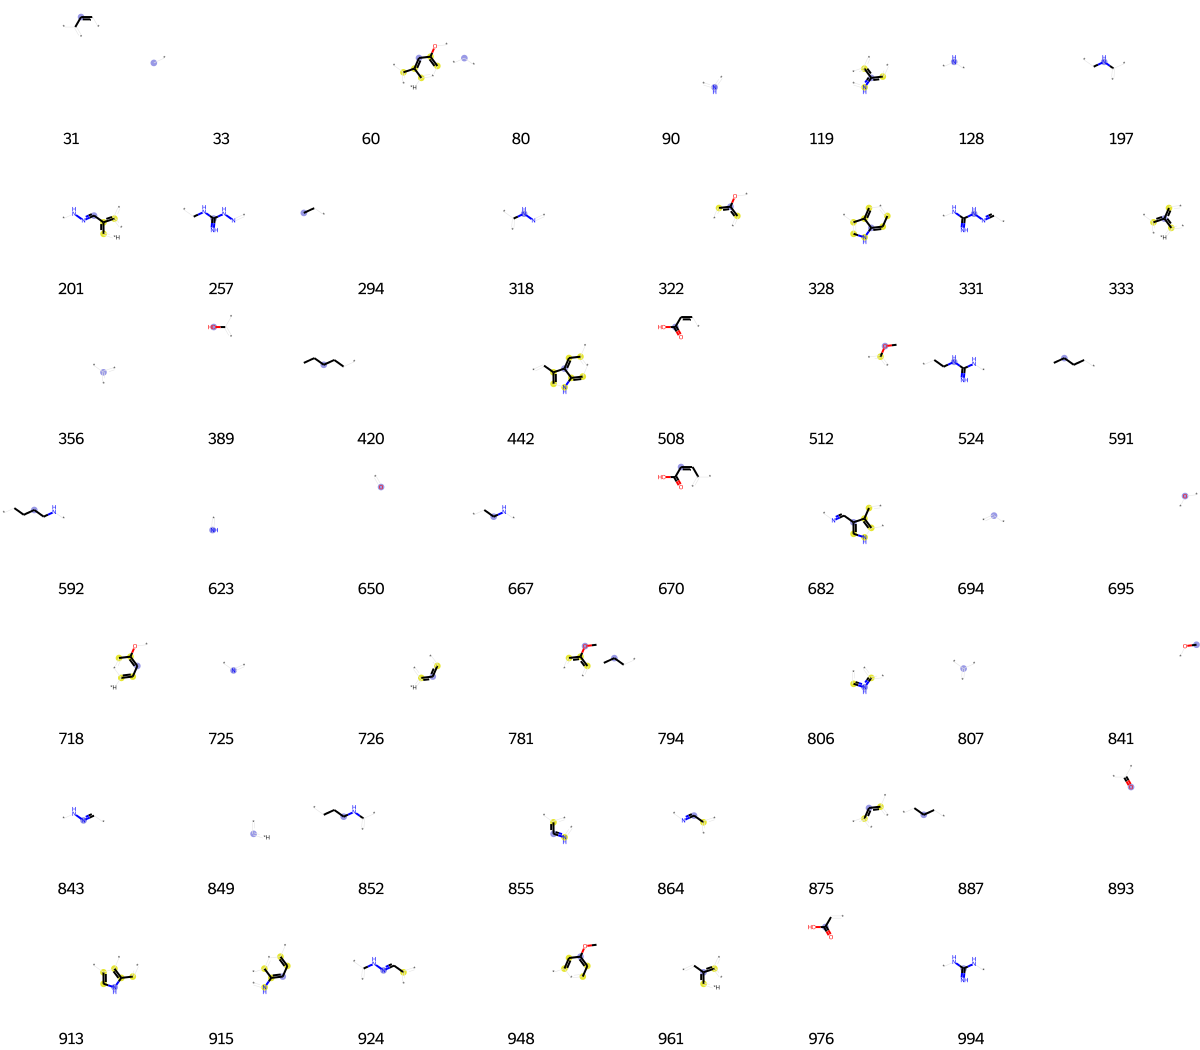

In [3564]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [3565]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 7,
 24,
 33,
 49,
 80,
 85,
 96,
 102,
 112,
 121,
 158,
 205,
 222,
 282,
 290,
 294,
 305,
 322,
 333,
 356,
 360,
 378,
 394,
 420,
 473,
 553,
 593,
 674,
 695,
 747,
 775,
 780,
 790,
 807,
 849,
 873,
 875,
 876,
 932,
 935]

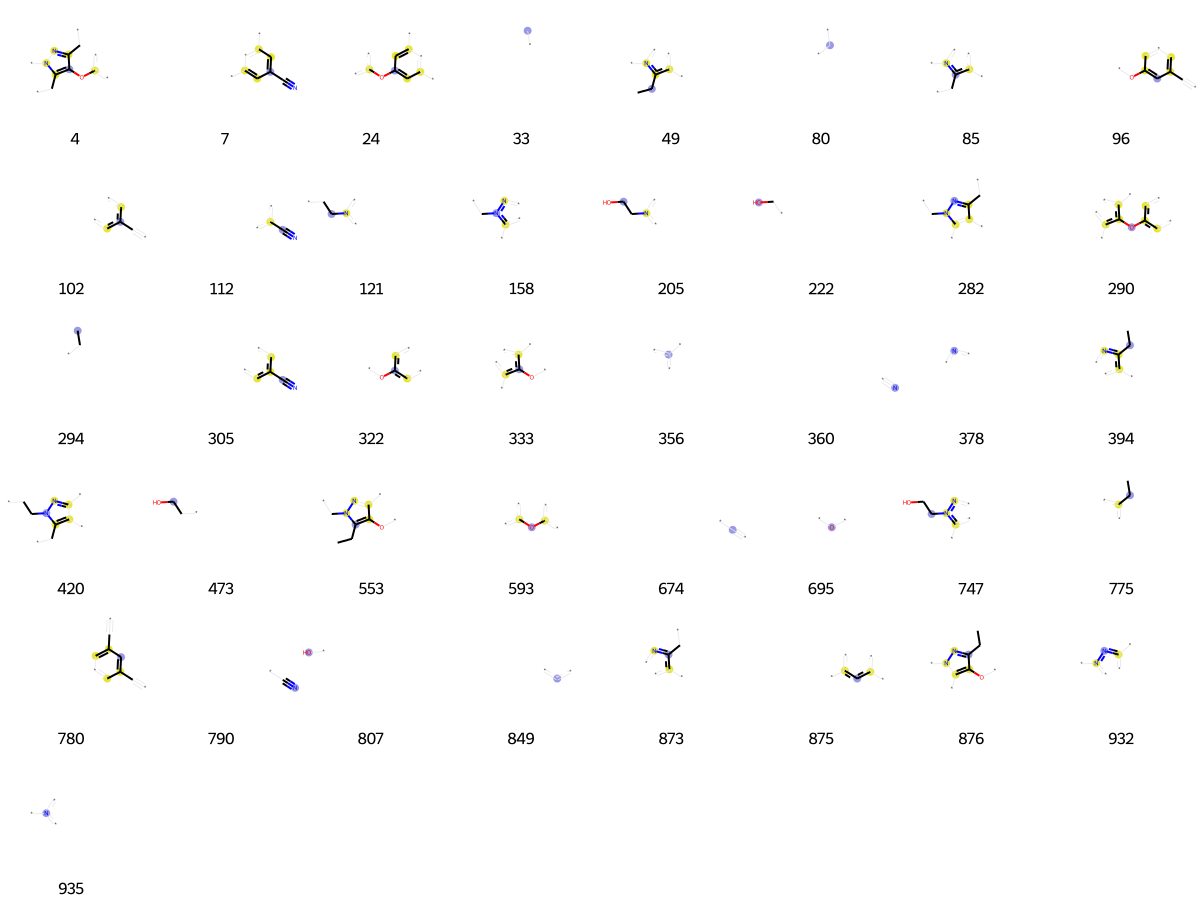

In [3566]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [3567]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[46,
 186,
 210,
 216,
 319,
 322,
 348,
 350,
 356,
 452,
 561,
 650,
 659,
 695,
 715,
 718,
 726,
 808,
 816,
 849,
 852,
 967]

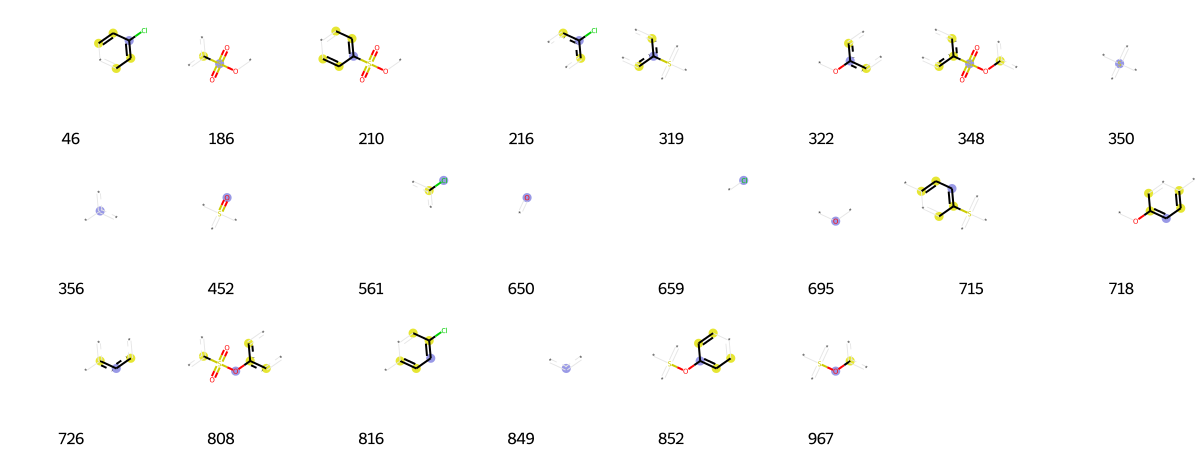

In [3568]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [3569]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 36,
 84,
 88,
 138,
 228,
 242,
 250,
 258,
 268,
 288,
 299,
 301,
 314,
 356,
 384,
 412,
 455,
 456,
 479,
 519,
 529,
 546,
 555,
 563,
 581,
 622,
 640,
 650,
 656,
 665,
 675,
 714,
 734,
 769,
 770,
 781,
 841,
 849,
 854,
 860,
 874,
 926,
 942,
 970,
 985,
 1009,
 1013,
 1015,
 1019]

In [3570]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[29,
 33,
 42,
 64,
 67,
 80,
 116,
 175,
 230,
 231,
 249,
 301,
 356,
 362,
 389,
 394,
 432,
 456,
 458,
 480,
 489,
 512,
 542,
 573,
 650,
 652,
 695,
 699,
 711,
 726,
 730,
 800,
 807,
 811,
 841,
 849,
 872,
 875,
 893,
 926,
 935,
 942,
 946,
 964,
 967,
 985,
 1019]

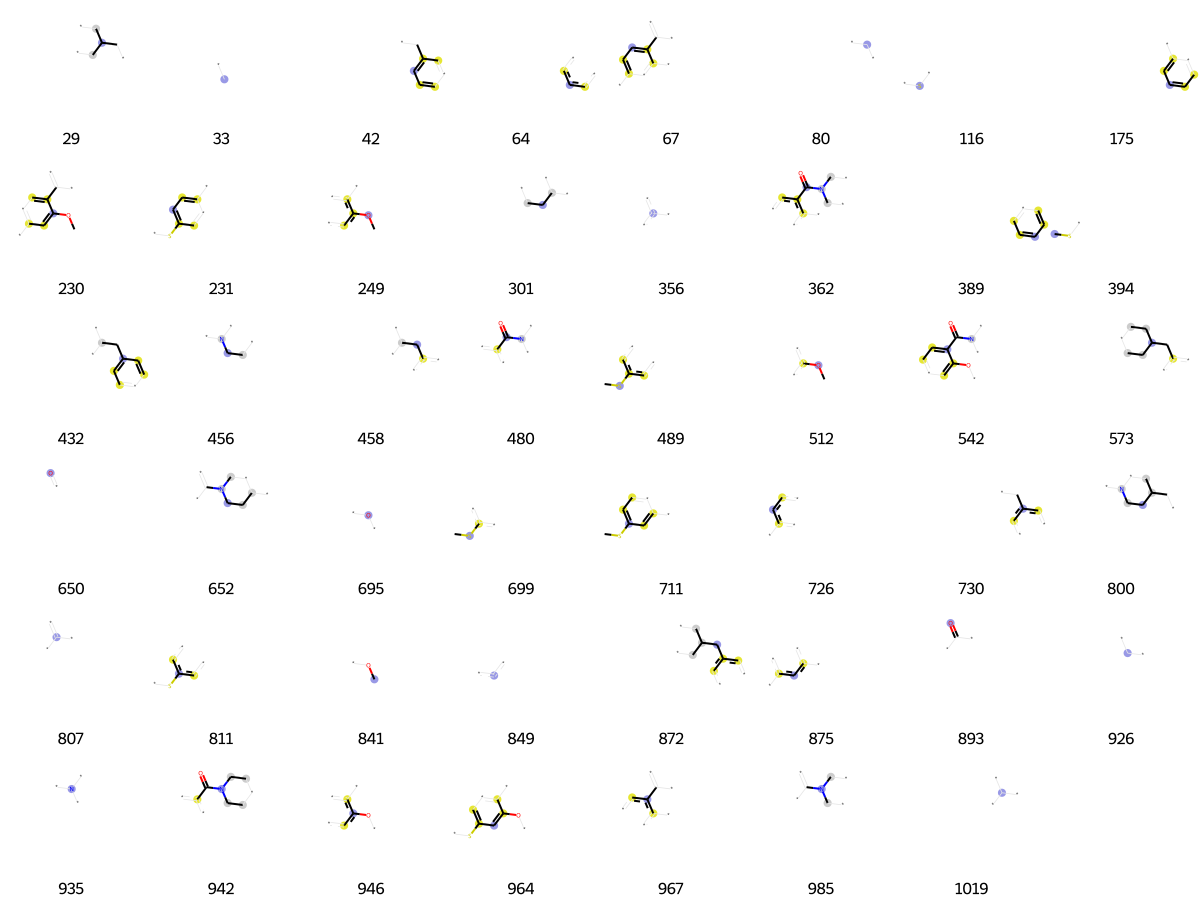

In [3571]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [3572]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 33,
 52,
 80,
 83,
 90,
 121,
 190,
 213,
 234,
 283,
 314,
 333,
 356,
 378,
 403,
 485,
 503,
 504,
 506,
 515,
 564,
 634,
 650,
 672,
 690,
 695,
 721,
 745,
 771,
 772,
 802,
 823,
 831,
 841,
 898,
 935,
 995,
 1005]

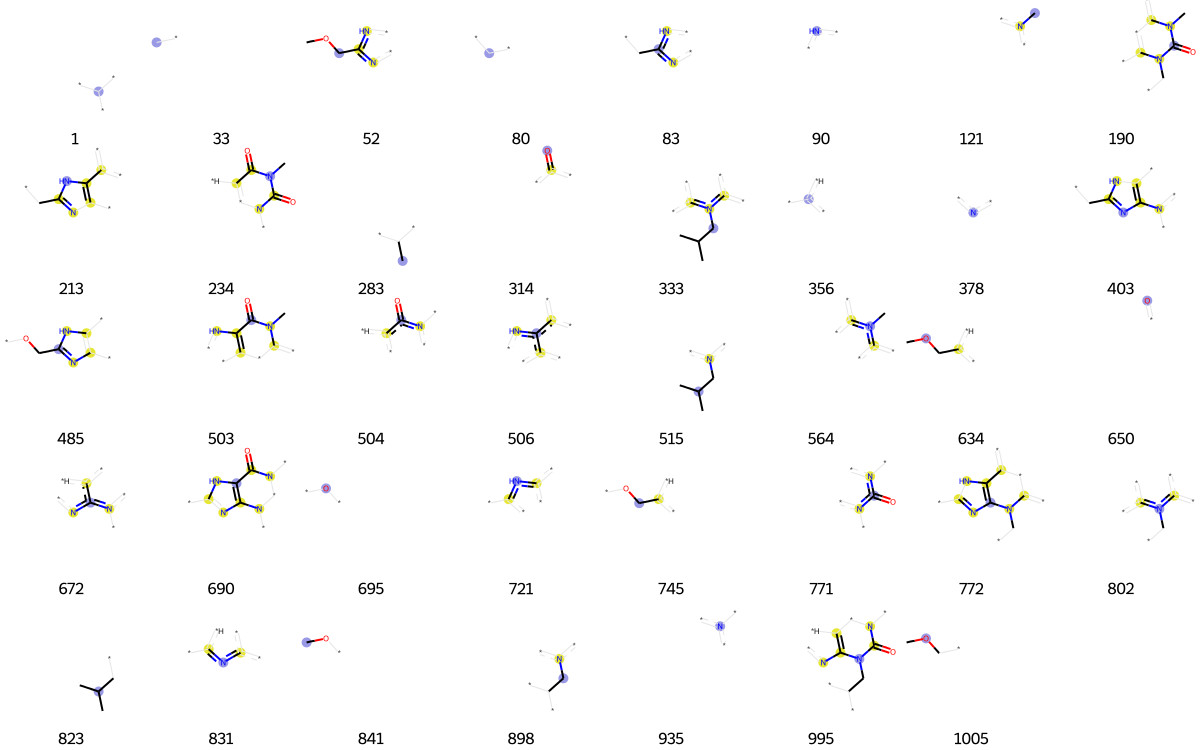

In [3573]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [3574]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[106,
 114,
 147,
 173,
 319,
 350,
 356,
 361,
 389,
 452,
 456,
 465,
 583,
 650,
 673,
 715,
 726,
 807,
 833,
 849,
 893]

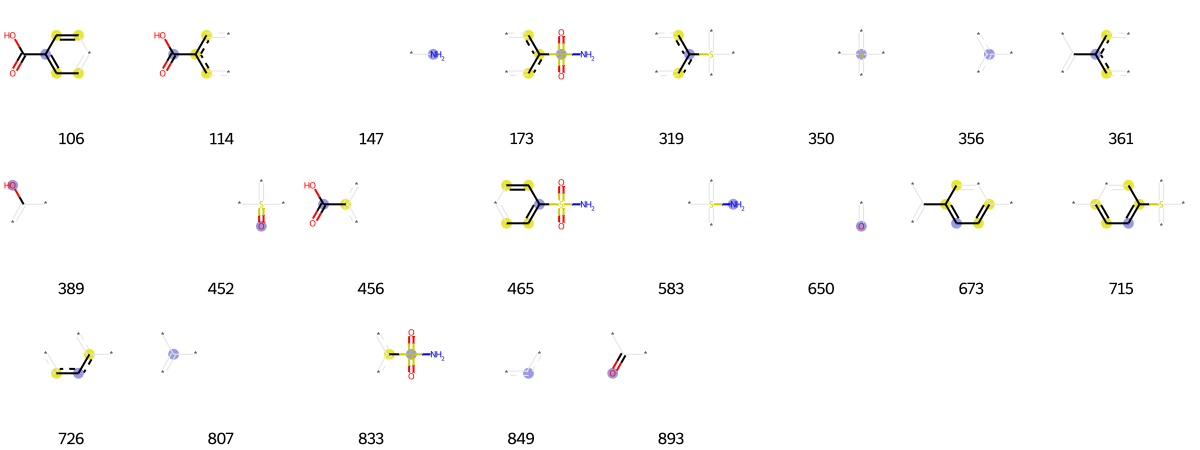

In [3575]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [3576]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[74, 80, 224, 277, 288, 307, 389, 456, 650, 713, 767, 807, 893, 926, 935]

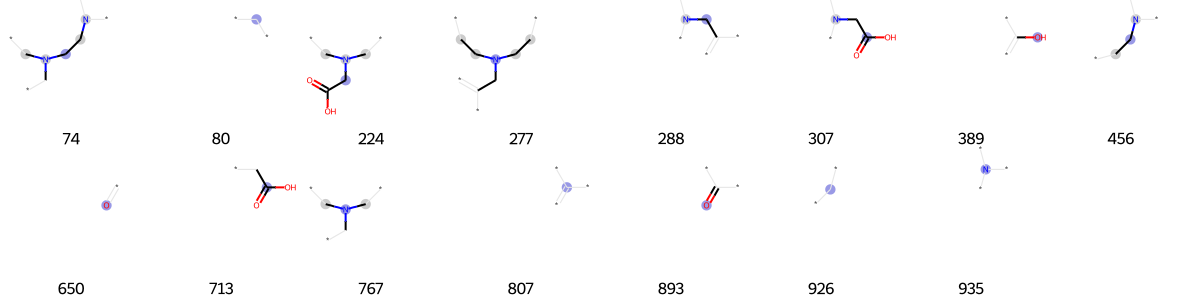

In [3577]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [3578]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[29,
 33,
 80,
 90,
 94,
 128,
 136,
 197,
 225,
 252,
 255,
 259,
 293,
 294,
 300,
 301,
 310,
 314,
 315,
 356,
 367,
 380,
 381,
 417,
 424,
 456,
 457,
 486,
 500,
 523,
 539,
 634,
 650,
 656,
 659,
 698,
 716,
 721,
 726,
 730,
 741,
 747,
 750,
 767,
 769,
 770,
 784,
 790,
 807,
 809,
 813,
 825,
 835,
 845,
 849,
 875,
 881,
 893,
 896,
 926,
 932,
 935,
 940,
 945,
 950,
 967,
 994,
 1010,
 1019,
 1023]

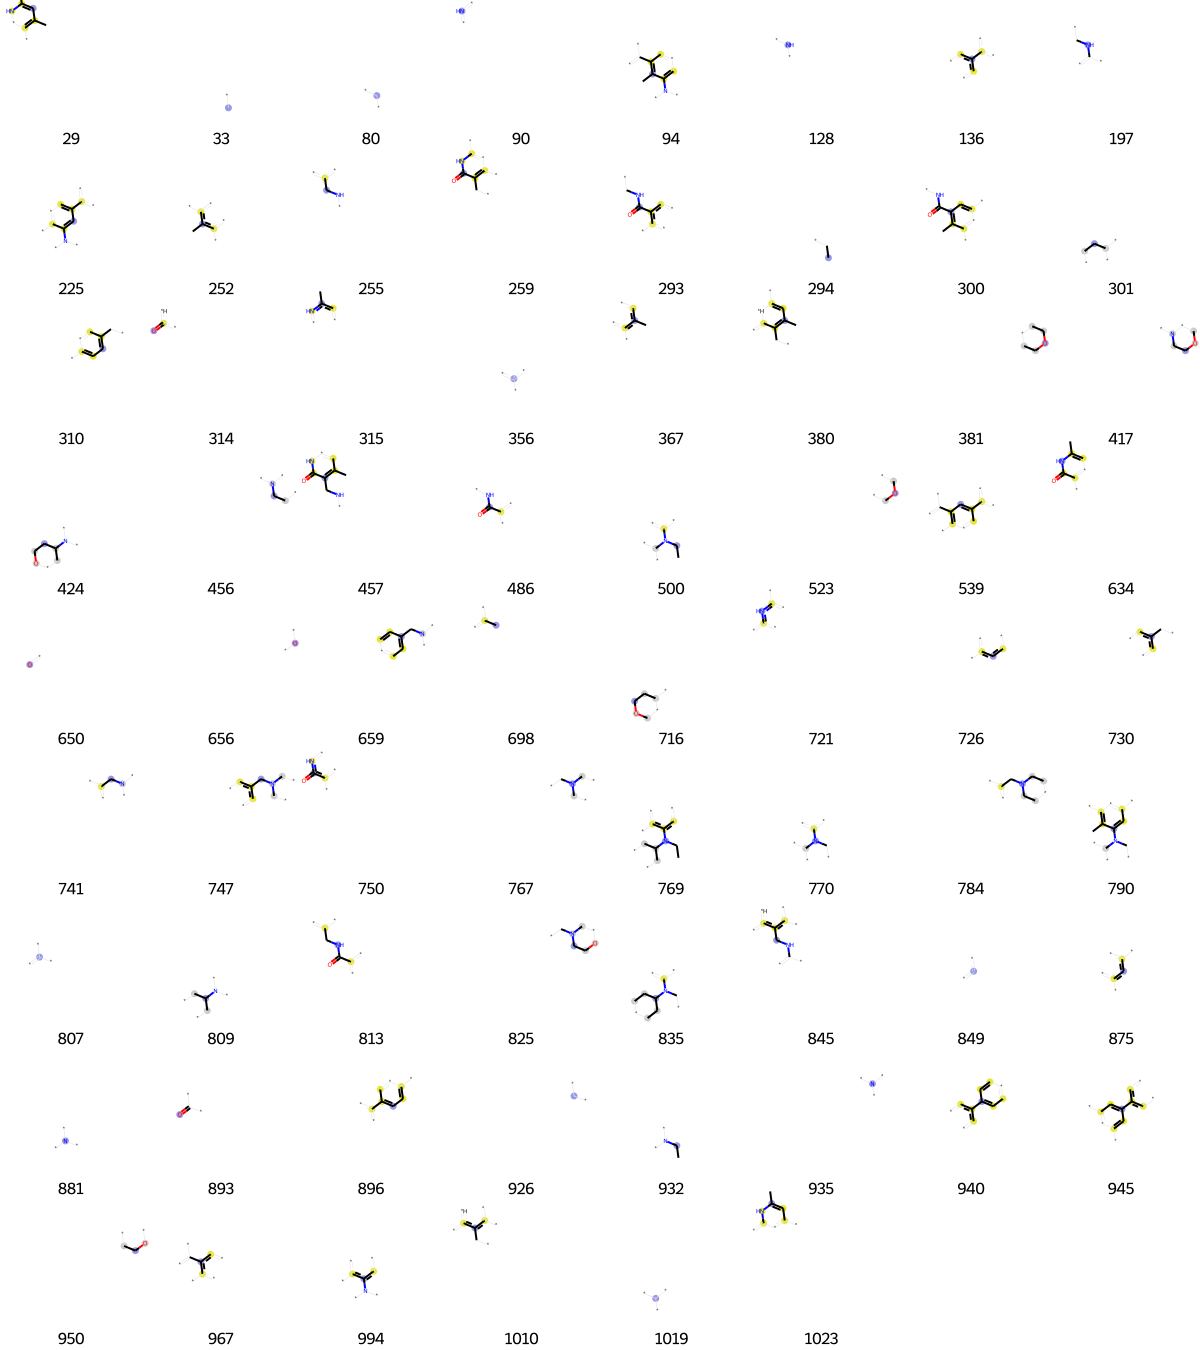

In [3579]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [3580]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[15,
 33,
 60,
 63,
 64,
 80,
 90,
 119,
 175,
 223,
 275,
 292,
 322,
 323,
 333,
 344,
 352,
 356,
 377,
 378,
 428,
 506,
 512,
 549,
 571,
 695,
 718,
 720,
 721,
 726,
 781,
 787,
 831,
 841,
 842,
 849,
 875,
 915,
 919,
 940,
 948,
 984,
 1020]

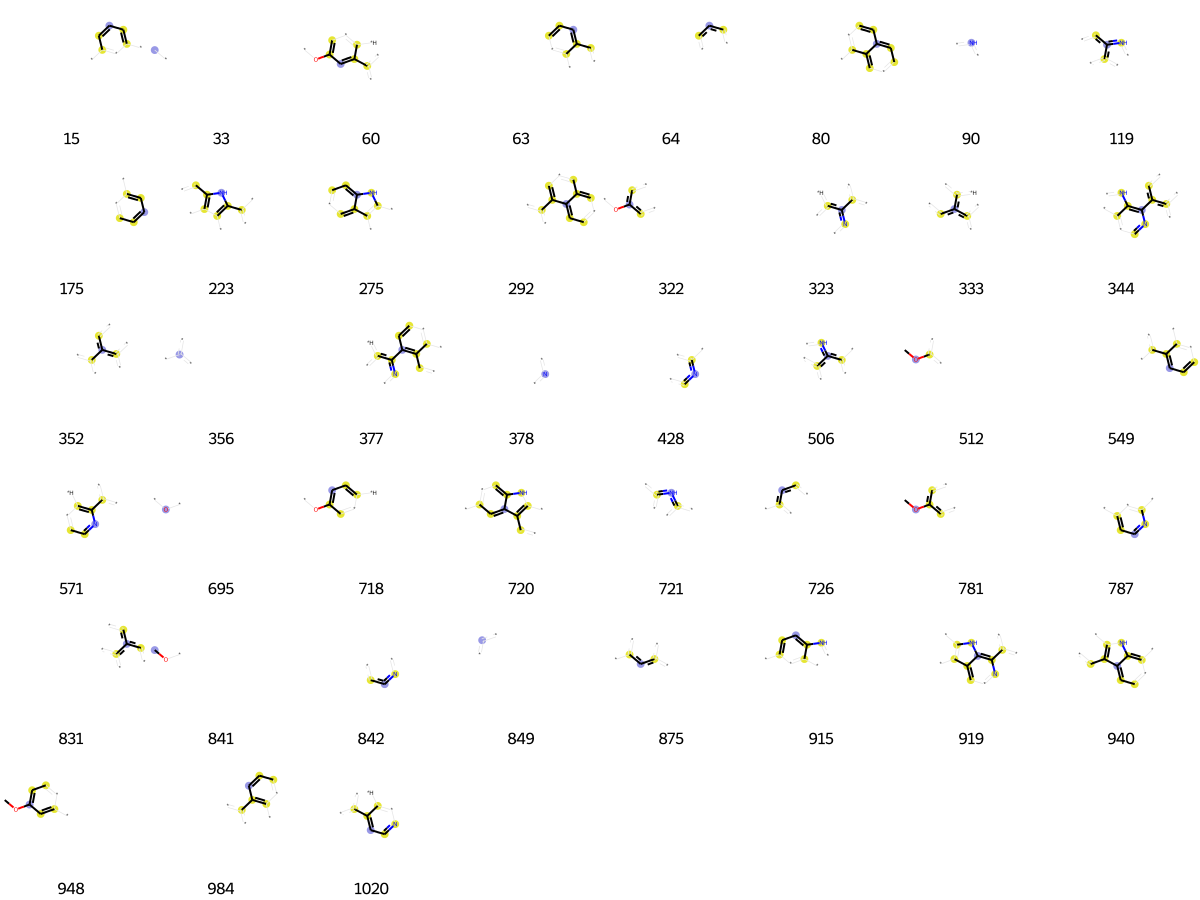

In [3581]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [3582]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 46,
 80,
 128,
 222,
 227,
 343,
 377,
 406,
 482,
 530,
 606,
 657,
 807,
 829,
 831,
 888,
 971]

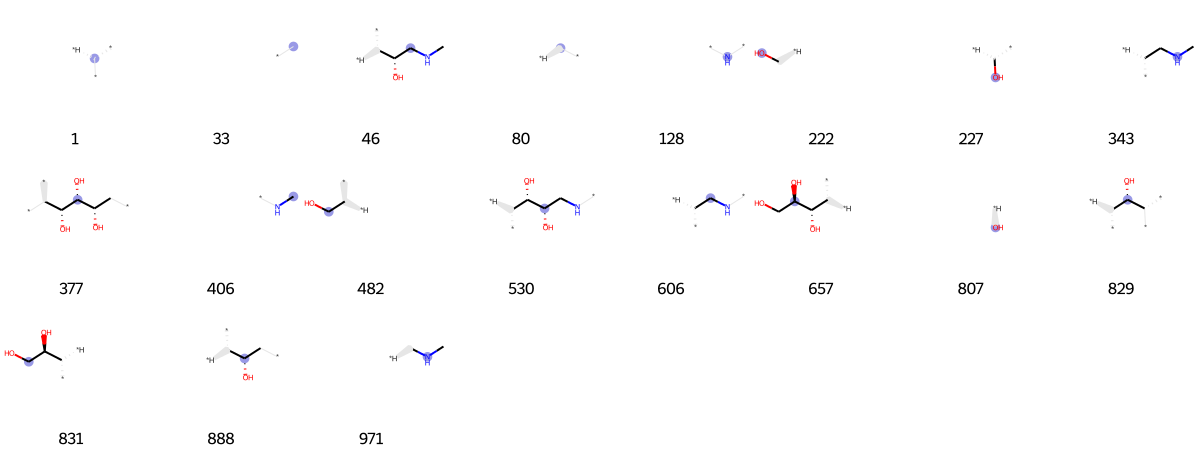

In [3583]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])